### Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Case Study and Description](#section2)</br>
- 3. [Load the packages and data](#section3)</br>
- 4. [Data Profiling](#section4)</br>
    - 4.1 [Understanding the Dataset](#section401)<br/>
    - 4.2 [Pre-Profiling](#section402)<br/>
    - 4.3 [Pre-Processing](#section403)<br/>
    - 4.4 [Post-Profiling](#section404)<br/>
- 5. [Data Analysis](#section5)</br>
    - 5.1 [Volume Sales Analysis](#section501)<br/>
    - 5.2 [Revenue Analysis](#section502)<br/>
    - 5.3 [Analysis based on Body type](#section503)<br/>
    - 5.4 [Analysis based on Engine type](#section504)<br/>
    - 5.5 [Country Wise Sales Analysis](#section505)<br/>
    - 5.6 [Price Based Analysis](#section506)<br/>
    - 5.7 [Model Wise Analysis](#section507)<br/>
    - 5.8 [Mileage Analysis](#section508)<br/>
    - 5.9 [Registration Analysis](#section509)<br/>
- 6. [Conclusion](#section6)</br>


<a id=section1></a>
# 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
Exploratory Data Analysis 
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions
- Preliminary selection of appropriate models
- Detection of mistakes 

<a id=section2></a>
# 2. Case Study and Description

- The case study chosen has a dataset ('car_sales.csv') which consists of information pertaining to the sales of different cars. 
- The dataset comprises of entries corresponding to 9576 different car units. Below is a table showing names of all the columns and their description. Each of this column describe the corresponding aspect of the car.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| car           | Manufacturer Name                                         | 
| price         | Price of the car in Dollars                               |  
| body          | Chassis type                                              | 
| mileage       | Mileage of the car                                        |   
| engV          | Engine Volume in Litres                                   |
| engType       | Engine Type                                               |
| registration  | Registration status                                       |
| year          | Year of sale                                              |
| model         | Model of the car                                          |
| drive         | Drive type                                                |

<a id=section3></a>
# 3. Load the packages and data

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling   

In [3]:
car_sales_df = pd.read_csv("https://raw.githubusercontent.com/RajkumarBharathi/Insaid2019_April_EDA/master/car_sales.csv")

<a id=section4></a>
# 4. Data Profiling

<a id=section401></a>
## 4.1 Understanding the dataset

In [4]:
car_sales_df.shape

(9576, 10)

There are __9576__ rows with __10__ columns in each row. 

In [5]:
car_sales_df.columns                                           

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [6]:
car_sales_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [7]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [8]:
car_sales_df.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [9]:
car_sales_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [10]:
car_sales_df.car.nunique()

87

In [11]:
car_sales_df.model.nunique()

888

<a id=section402></a>
## 4.2 Pre-Profiling

In [12]:
pre_process_profile = pandas_profiling.ProfileReport(car_sales_df)
pre_process_profile.to_file(outputfile="car_sales_preprocessing.html")

From the pre-profiling output, the following information can be derived:
- There are __87__ distinct car makers 
- There are __888__ distinct car models
- There are 267 / 2.8% entries with zeros values for price
- There are 348 / 3.6%  entries with zeros values for mileage
- Engine Volume has 434 / 4.5% missing values 
- drive has 511 / 5.3% missing values Missing

In [13]:
car_sales_unique_df = car_sales_df.drop_duplicates()
car_sales_unique_df.shape

(9463, 10)

<a id=section403></a>
## 4.3 Pre-Processing

### 4.3.1 Dealing with Zero values for Price

- There are 267 car units which do have '0' as the price. This can be replaced with the corresponding median price depending upon the 'Model' of the car.
- Further investigation into the data reveals that the following 'models' have only Zero price entries. So, the price for such models will be determined based on the median of 'car' (manufacturer).
 - 'Safari'
 - '69'
 - 'Genesis'
 - '2109 (Балтика)'
 - '969 Волынь'
 - 'Sprinter 310 пасс.'
 - 'Alpina'
 - 'Karma'
- Only 'Fisker' car with 'karma' model has only a single zero price entry

In [15]:
#Obtain average price for every model
model_based_price_grp = car_sales_df[car_sales_df['price'] != 0.0].groupby(['model'])['price']
model_based_price_grp.agg(np.median).head()

model
1 Series    4100.0
1.3         1000.0
10          3600.0
100         4000.0
106         1900.0
Name: price, dtype: float64

In [16]:
make_based_price_grp = car_sales_df[car_sales_df['price'] != 0.0].groupby(['car'])['price']
make_based_price_grp.agg(np.median).head()

car
Acura            15000.0
Alfa Romeo       11900.0
Aro               3600.0
Aston Martin    125000.0
Audi             11900.0
Name: price, dtype: float64

In [17]:
model_price_dict = {'dummy1' : 0.0}

klist = model_based_price_grp.groups.keys()

#store the average price for each model in a dictionary
for key in klist:
    median_price = model_based_price_grp.get_group(key).median()
    model_price_dict[key] = median_price
    
    
print(len(model_price_dict))

881


In [18]:
make_price_dict = {'dummy1' : 0.0}

klist = make_based_price_grp.groups.keys()

#store the average price for each car maker in a dictionary
for key in klist:
    median_price = make_based_price_grp.get_group(key).median()
    make_price_dict[key] = median_price
    
print(len(make_price_dict))

87


In [19]:
#overall average price
overall_price_median = car_sales_df['price'].median()
overall_price_median

9200.0

In [20]:
#split into data frames which have non-zero and zero prices
car_sales_nonzero_df = car_sales_df[car_sales_df['price'] != 0]

car_sales_zero_df = car_sales_df[car_sales_df['price'] == 0]

In [21]:
#separate data frame for those models which have only Zero Price
only_zero_price_df = car_sales_zero_df.loc[car_sales_zero_df['model'].isin(['Genesis', '969 Волынь', '69', 'Safari', '2109 (Балтика)', 'Sprinter 310 пасс.', 'Alpina'])]
only_zero_price_df

,car,price,body,mileage,engV,engType,registration,year,model,drive
3280,Hyundai,0.0,sedan,27,5.0,Petrol,yes,2013,Genesis,rear
3335,ЛUAZ,0.0,other,10,1.5,Petrol,yes,1991,969 Волынь,full
4038,GAZ,0.0,other,1,NaN,Other,yes,1958,69,NaN
5084,GAZ,0.0,crossover,1,NaN,Petrol,yes,1963,69,full
6248,GMC,0.0,crossover,130,4.3,Petrol,yes,1998,Safari,full
7220,VAZ,0.0,hatch,1,1.5,Gas,yes,1998,2109 (Балтика),front
7848,Mercedes-Benz,0.0,van,273,2.9,Diesel,yes,2001,Sprinter 310 пасс.,NaN
8772,BMW,0.0,sedan,99,4.4,Petrol,yes,2013,Alpina,full


In [22]:
zero_price_model_df = car_sales_zero_df.loc[~car_sales_zero_df['model'].isin(['Genesis', '969 Волынь', '69', 'Safari', '2109 (Балтика)', 'Sprinter 310 пасс.', 'Alpina', 'Karma'])]
zero_price_model_df.shape

(258, 10)

In [23]:
#Fisker - Karma is only one unit in occurrence with Zero price
karma_df = car_sales_zero_df.loc[car_sales_zero_df['model'].isin(['Karma'])]
karma_df.shape

(1, 10)

In [24]:
#Function to use average price based on model
def remove_zero_price_model(row):
    val = 0.0
    if (row['price'] == 0):
        val = model_price_dict[row['model']]
    else:
        val = row['price']
    return val    

#Function to use average price based on make
def remove_zero_price_make(row):
    val = 0.0
    if (row['price'] == 0):
        val = make_price_dict[row['car']]
    else:
        val = row['price']
    return val  

In [25]:
#use average price based on model
zero_price_model_df['price'] = zero_price_model_df.apply(remove_zero_price_model, axis=1)

#use average price based on make
only_zero_price_df['price'] = only_zero_price_df.apply(remove_zero_price_make, axis=1)

#use overall average price
karma_df['price'] = overall_price_median

C:\Users\310229901\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\310229901\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\310229901\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [26]:
zero_price_model_df[zero_price_model_df['price'] == 0].count()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [27]:
only_zero_price_df['price']

3280    10800.0
3335     1500.0
4038     2350.0
5084     2350.0
6248    26499.0
7220     2800.0
7848    14395.0
8772    14990.0
Name: price, dtype: float64

In [28]:
karma_df['price']

8824    9200.0
Name: price, dtype: float64

In [29]:
#concatenate all separate data frames
car_sales_nonzero_df = car_sales_nonzero_df.append(zero_price_model_df)
car_sales_nonzero_df = car_sales_nonzero_df.append(only_zero_price_df)
car_sales_nonzero_df = car_sales_nonzero_df.append(karma_df)
car_sales_nonzero_df.shape

(9576, 10)

In [30]:
car_sales_nonzero_df[car_sales_nonzero_df['price'] == 0].count()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [31]:
car_sales_nonzero_df[car_sales_nonzero_df['price'] == 0].count()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

### 4.3.2 Dealing with Zero values for Mileage

There are __348__ entries which have Zero mileage. This can be normalised by using the median value depending upon the engine type.


In [32]:
#Group based on Engine type
engine_based_mileage_grp = car_sales_nonzero_df[car_sales_nonzero_df['mileage'] != 0.0].groupby(['engType'])['mileage']

In [33]:
engine_based_mileage_grp.get_group('Gas').median()

147.0

In [34]:
mileage_dict = {'dummy1' : 0.0}

klist = engine_based_mileage_grp.groups.keys()

#store average mileage for every group based on engine type
for key in klist:
    median_price = engine_based_mileage_grp.get_group(key).median()
    mileage_dict[key] = median_price
    
#function to obtain average mileage
def remove_zero_mileage(row):
    val = 0.0
    if (row['mileage'] == 0):
        val = mileage_dict[row['engType']]
    else:
        val = row['mileage']
    return val   

In [35]:
#remove Zero mileage and store inline
car_sales_nonzero_df['mileage'] = car_sales_nonzero_df.apply(remove_zero_mileage, axis=1)

In [36]:
car_sales_nonzero_df[car_sales_nonzero_df['mileage'] == 0].count()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

### 4.3.3 Dealing with missing values for Engine Volume

There are __434__ which have null mileage values. This can be normalised by using the mode value depending upon the engine type.

In [37]:
car_sales_nonzero_df.count()[0]

9576

In [38]:
car_sales_nonzero_df['engV'].isnull().sum()

434

In [39]:
#group based on body type
volume_grp = car_sales_nonzero_df.groupby('body')['engV']
volume_grp.count()

body
crossover    2008
hatch        1151
other         784
sedan        3477
vagon         702
van          1020
Name: engV, dtype: int64

In [43]:
volume_dict = {'dummy1': 0.0}
klist = volume_grp.groups.keys()

#get most common engine volume based on body type using Mode value
for key in klist:
    cmode = volume_grp.get_group(key).mode()
    volume_dict[key] = cmode
    
print(len(volume_dict))

#function to provide common volume
def remove_null_volume(row):
    val = 0.0
    val = volume_dict[row['body']]

    return val   

7


In [44]:
#separate into 2 data frames based on null value for engine volume
nonnull_volume_df = car_sales_nonzero_df[car_sales_nonzero_df['engV'].notnull()]
null_volume_df = car_sales_nonzero_df[car_sales_nonzero_df['engV'].isnull()]
null_volume_df.shape

(434, 10)

In [45]:
null_volume_df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,Other,yes,2013,E-Class,NaN
13,BMW,4700.0,sedan,200.0,NaN,Petrol,yes,1996,316,rear
30,Nissan,13980.0,hatch,31.0,NaN,Other,yes,2013,Leaf,front
31,Nissan,17300.0,hatch,24.0,NaN,Other,yes,2013,Leaf,front
37,Audi,2850.0,sedan,260.0,NaN,Other,no,1999,A6,NaN
41,Nissan,13275.0,hatch,12.0,NaN,Other,yes,2013,Leaf,front
56,Nissan,17000.0,hatch,38.0,NaN,Other,yes,2013,Leaf,front
107,Volkswagen,33500.0,crossover,98.0,NaN,Petrol,yes,2013,Touareg,full
109,Nissan,12400.0,hatch,26.0,NaN,Other,yes,2011,Leaf,NaN
137,Mercedes-Benz,93555.0,crossover,99.0,NaN,Other,yes,2016,GLS 350,NaN


In [47]:
#remove null volume in place
null_volume_df['engV'] = null_volume_df.apply(remove_null_volume, axis=1)

C:\Users\310229901\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
null_volume_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           108
dtype: int64

In [49]:
dfn1 = null_volume_df[null_volume_df['engV'].isnull()]
dfn1

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [50]:
car_sales_nonzero_df = nonnull_volume_df
car_sales_nonzero_df = car_sales_nonzero_df.append(null_volume_df)

In [51]:
car_sales_nonzero_df.shape

(9576, 10)

In [52]:
car_sales_nonzero_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

### 4.3.4 Dealing with missing values for Drive

There are __511__ entries with null values for Drive. This can be normalised by using the mode value.

In [53]:
#replace null values for drive using mode
car_sales_nonzero_df.drive = car_sales_nonzero_df.drive.fillna(car_sales_nonzero_df['drive'].mode()[0])

In [54]:
car_sales_nonzero_df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

<a id=section404></a>
## 4.4 Post-Profiling

In [124]:
post_process_profile = pandas_profiling.ProfileReport(car_sales_nonzero_df)
post_process_profile.to_file(outputfile="car_sales_postprocessing.html")

<a id=section5></a>
# 5 Data Analysis

<a id=section501></a>
## 5.1 Volume Sales Analysis

### 5.1.1 Year wise overall car sales

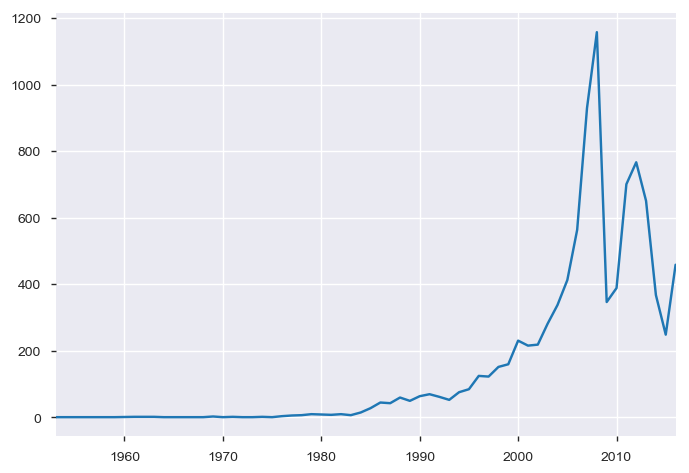

In [56]:
car_sales_nonzero_df['year'].value_counts().sort_index().plot.line()

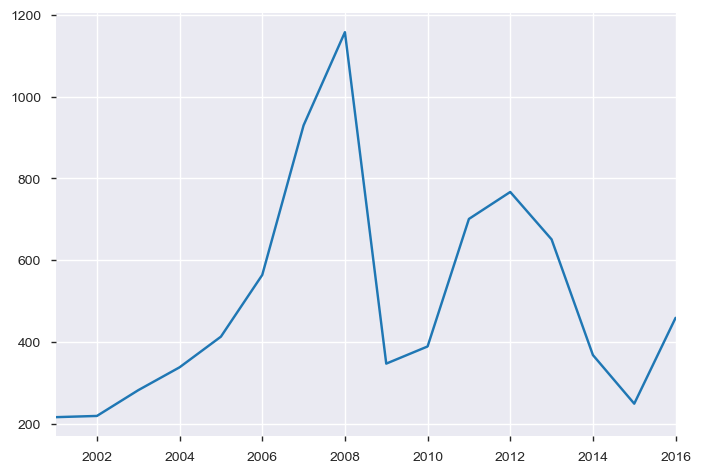

In [57]:
car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2000) &  (car_sales_nonzero_df['year'] < 2020)]['year'].value_counts().sort_index().plot.line()

In [58]:
car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2000) &  (car_sales_nonzero_df['year'] < 2020)]['year'].value_counts()

2008    1158
2007     930
2012     767
2011     701
2013     651
2006     564
2016     459
2005     413
2010     389
2014     368
2009     347
2004     338
2003     282
2015     249
2002     219
2001     216
Name: year, dtype: int64

The year __2008__ saw the highest car sales in terms of number of units with __1158__ units. 
It can also be seen that there was a significant dip in sales in the years of __2009__ and __2015__.

#### Decade wide analysis

In [59]:
def group_into_decade(row):
    decade = ''
    if ((row['year'] > 1950) & (row['year'] <= 1960)):
        decade = '1951-60'
    elif ((row['year'] > 1960) & (row['year'] <= 1970)):
        decade = '1961-70'
    elif ((row['year'] > 1970) & (row['year'] <= 1980)):
        decade = '1971-80'
    elif ((row['year'] > 1980) & (row['year'] <= 1990)):
        decade = '1981-90'
    elif ((row['year'] > 1990) & (row['year'] <= 2000)):
        decade = '1991-2000'
    elif ((row['year'] > 2000) & (row['year'] <= 2010)):
        decade = '2001-10'
    else:
        decade = '2011-20'
    return decade

In [60]:
car_sales_nonzero_df['decade'] = car_sales_nonzero_df.apply(group_into_decade, axis=1)

In [61]:
car_sales_nonzero_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,decade
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,2001-10
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear,2011-20
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear,2001-10
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front,2011-20
5,Nissan,16600.0,crossover,83.0,2.0,Petrol,yes,2013,X-Trail,full,2011-20


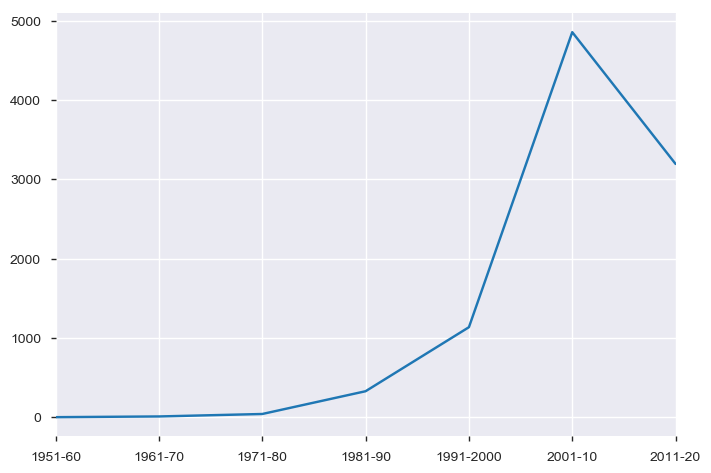

In [62]:
car_sales_nonzero_df['decade'].value_counts().sort_index().plot.line()

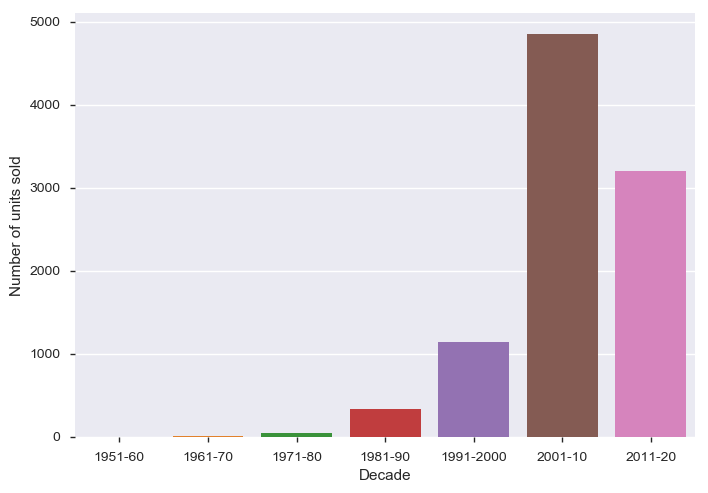

In [63]:
sns.countplot(x=car_sales_nonzero_df['decade'], order=['1951-60', '1961-70', '1971-80', '1981-90','1991-2000', '2001-10', '2011-20',]);
plt.xlabel('Decade');
plt.ylabel('Number of units sold');

In [64]:
car_sales_nonzero_df['decade'].value_counts()

2001-10      4856
2011-20      3195
1991-2000    1137
1981-90       330
1971-80        43
1961-70        12
1951-60         3
Name: decade, dtype: int64

It can be seen that the highest car sales in terms of number of units sold happened in the __2001-10__ period with 4856 units.

### 5.1.2 Overall Sales by Car makers

In [65]:
car_sales_nonzero_df['car'].value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Renault          469
Audi             457
Opel             400
Skoda            368
Nissan           368
Hyundai          367
Ford             350
Mitsubishi       327
Chevrolet        246
Daewoo           235
Kia              215
Honda            206
Mazda            198
Peugeot          182
Lexus            174
Land Rover       151
Fiat             119
Subaru           114
Citroen          108
ZAZ              102
Porsche           92
Infiniti          64
Suzuki            58
Smart             57
Geely             56
                ... 
Cadillac           3
GMC                3
Aston Martin       3
Daihatsu           3
Groz               2
Bogdan             2
Ferrari            2
JAC                2
Rolls-Royce        2
Isuzu              2
Dadi               2
Samand             2
FAW                1
Lamborghini        1
Saab               1
Fisker             1
Buick        

__Volswagen__ accounts for highest number of cars sold with __936__ units followed by __Mercedes-Benz__ at __921__ and __BMW__ at 694.

<a id=section502></a>
## 5.2 Revenue Analysis

### 5.2.1 Overall revenues by Car Manufacturers

In [66]:
car_sales_nonzero_df.groupby(['car'])['price'].sum().sort_values(ascending = False)

car
Mercedes-Benz    3.022257e+07
BMW              1.652771e+07
Toyota           1.255471e+07
Volkswagen       1.227879e+07
Audi             8.357068e+06
Land Rover       8.263275e+06
Lexus            5.492311e+06
Nissan           5.212011e+06
Porsche          4.655272e+06
Hyundai          4.645531e+06
Skoda            3.993390e+06
Renault          3.770917e+06
Ford             3.738902e+06
Mitsubishi       3.696265e+06
Bentley          3.660073e+06
Honda            2.815723e+06
Chevrolet        2.646205e+06
Kia              2.634990e+06
Opel             2.535727e+06
Tesla            2.189200e+06
Mazda            2.045451e+06
Infiniti         1.775456e+06
Subaru           1.604794e+06
Peugeot          1.597696e+06
VAZ              1.408759e+06
Citroen          9.107444e+05
Daewoo           8.930025e+05
Fiat             7.836832e+05
SsangYong        6.413407e+05
Jeep             6.411880e+05
                     ...     
Rover            5.005000e+04
MG               3.659800e+04
Isuzu 

__Mercedes-Benz__ has earned the most revenues overall with __30,222,570__ dollars followed by __BMW__ with __16,527,710__ and __Toyota__ with __12,554,710__ dollars.

### 5.2.2 Year Wise Revenue from 2000

In [67]:
car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2000) &  (car_sales_nonzero_df['year'] < 2020)].groupby('year')['price'].sum()

year
2001    1.313135e+06
2002    1.425043e+06
2003    2.104688e+06
2004    2.685409e+06
2005    3.654050e+06
2006    5.595159e+06
2007    1.014267e+07
2008    1.447280e+07
2009    5.369780e+06
2010    7.108879e+06
2011    1.424072e+07
2012    1.457531e+07
2013    1.646772e+07
2014    1.282588e+07
2015    1.064906e+07
2016    3.052609e+07
Name: price, dtype: float64

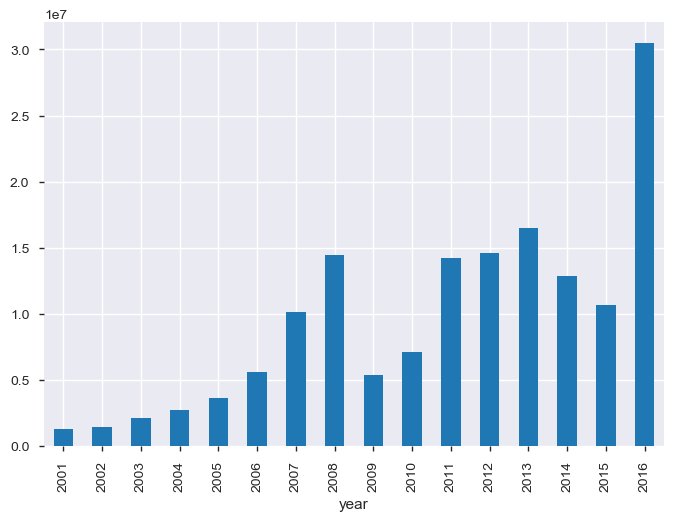

In [68]:
car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2000) &  (car_sales_nonzero_df['year'] < 2020)].groupby('year')['price'].sum().plot.bar()

The highest revenue was earned in __2016__ through 30,526,090 dollars worth of sales while there are was a drop in __2009__ with the total revenue being only 5,369,780 dollars where the drop from 2008 was __9,103,020__ dollars.

### 5.2.3 Drop in Revenue in 2009

Almost all car makers experienced downturn in sales in __2009__. Determine the ones who experienced maximum loss in revenue.

In [69]:
ls1 = car_sales_nonzero_df[car_sales_nonzero_df['year'] == 2008].groupby(['car'])['car'].count().keys().tolist()
ls2 = car_sales_nonzero_df[car_sales_nonzero_df['year'] == 2008].groupby(['car'])['price'].sum().tolist()
len(ls1)
sales_2008_df = pd.DataFrame(columns=['car', 'sales'])
sales_2008_df['car'] = ls1
sales_2008_df['sales'] = ls2

ls1 = car_sales_nonzero_df[car_sales_nonzero_df['year'] == 2009].groupby(['car'])['car'].count().keys().tolist()
ls2 = car_sales_nonzero_df[car_sales_nonzero_df['year'] == 2009].groupby(['car'])['price'].sum().tolist()
len(ls1)
sales_2009_df = pd.DataFrame(columns=['car', 'sales'])
sales_2009_df['car'] = ls1
sales_2009_df['sales'] = ls2

In [70]:
sales_2008_2009_df = pd.merge(left = sales_2008_df, right = sales_2009_df, on='car')
sales_2008_2009_df['diff'] = sales_2008_2009_df['sales_y'] - sales_2008_2009_df['sales_x']
sales_2008_2009_df

,car,sales_x,sales_y,diff
0,Alfa Romeo,36000.000,15300.0,-20700.000
1,Audi,447296.000,365895.0,-81401.000
2,BMW,923171.000,418648.5,-504522.500
3,Bentley,308500.000,145000.0,-163500.000
4,Chery,94221.500,7500.0,-86721.500
5,Chevrolet,310594.000,68849.0,-241745.000
6,Chrysler,22600.000,26700.0,4100.000
7,Citroen,70425.000,31400.0,-39025.000
8,Dacia,11250.000,12300.0,1050.000
9,Daewoo,155720.475,19600.0,-136120.475


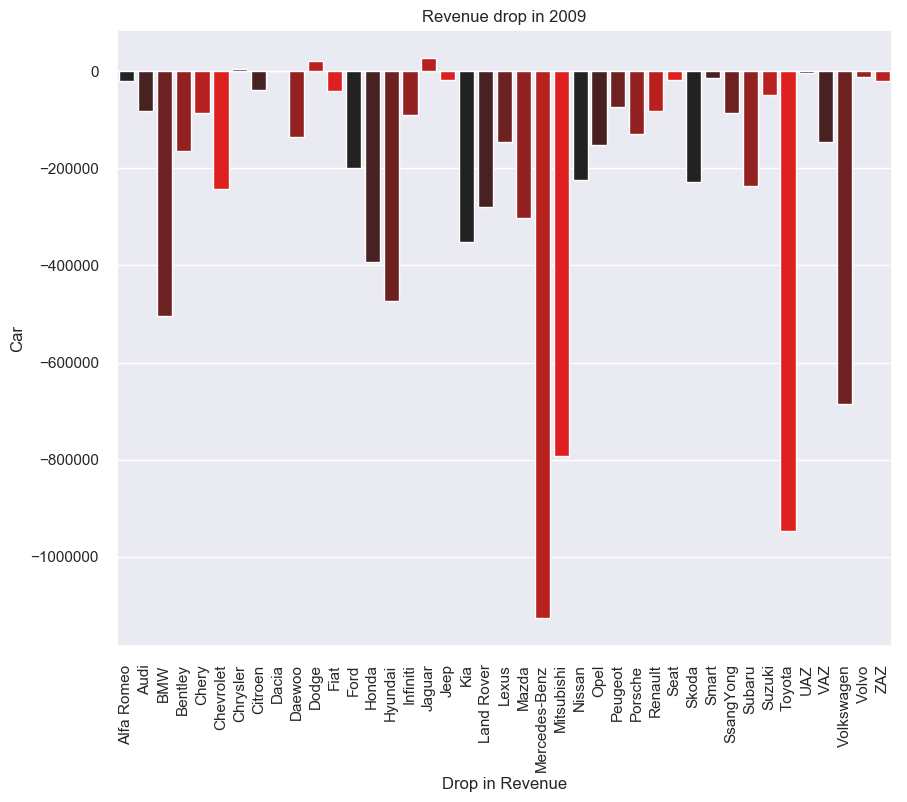

In [101]:
plt.figure(figsize=(10,8))
sns.set(color_codes=True) 
bplt = sns.barplot(x = sales_2008_2009_df['car'], y = sales_2008_2009_df['diff'], palette=sns.dark_palette("red"))
for item in bplt.get_xticklabels():
    item.set_rotation(90)

plt.title("Revenue drop in 2009")  
plt.ylabel('Car', fontsize=12)
plt.xlabel('Drop in Revenue', fontsize=12)
plt.show()

__Mercedes-Benz__ was the worst affected with a loss of __1126277.0__ followed by Toyota with a loss of __946332.0__ and Mitsubishi with __791515.0__

<a id=section503></a>
## 5.3 Analysis based on Body type

### 5.3.1 General Analysis

#### General Sales Analysis


In [72]:
car_sales_nonzero_df.groupby(['body'])['body'].value_counts()

body       body     
crossover  crossover    2069
hatch      hatch        1252
other      other         838
sedan      sedan        3646
vagon      vagon         722
van        van          1049
Name: body, dtype: int64

On a whole, __3646 Sedans__ have been sold making them the leader followed by __Crossover__ at 2069 and __Hatch__ at 1252 cars.

#### General Revenue Analysis

In [73]:
car_sales_nonzero_df.groupby(['body'])['price'].sum().sort_values(ascending = False)

body
crossover    6.734592e+07
sedan        4.606557e+07
other        1.665312e+07
van          1.188097e+07
hatch        1.074676e+07
vagon        6.477294e+06
Name: price, dtype: float64

__Crossover__ car segment fetches maximum revenue  with __67,345,920__ dollars followed by __Sedan__ with __46,065,570__ dollars.


### 5.3.2 Specific Analysis

#### Sales from 2000 onwards

In [74]:
body_year_grp = car_sales_nonzero_df[car_sales_nonzero_df['year'] > 2000].groupby(['year'])['body'].value_counts()
body_year_grp

year  body     
2001  sedan        100
      vagon         41
      van           28
      hatch         19
      other         17
      crossover     11
2002  sedan         84
      van           33
      hatch         27
      other         27
      vagon         25
      crossover     23
2003  sedan        108
      van           45
      vagon         42
      crossover     41
      hatch         23
      other         23
2004  sedan        139
      van           57
      crossover     48
      other         34
      hatch         33
      vagon         27
2005  sedan        159
      van           69
      crossover     63
      hatch         50
      other         42
      vagon         30
                  ... 
2012  sedan        203
      crossover    165
      van          135
      hatch        125
      other         70
      vagon         69
2013  sedan        196
      crossover    185
      hatch        113
      van           75
      other         48
      vagon       

In [75]:
body_types = car_sales_nonzero_df.body.unique().tolist()
body_types

['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch']

Text(0.5, 0, 'Year')

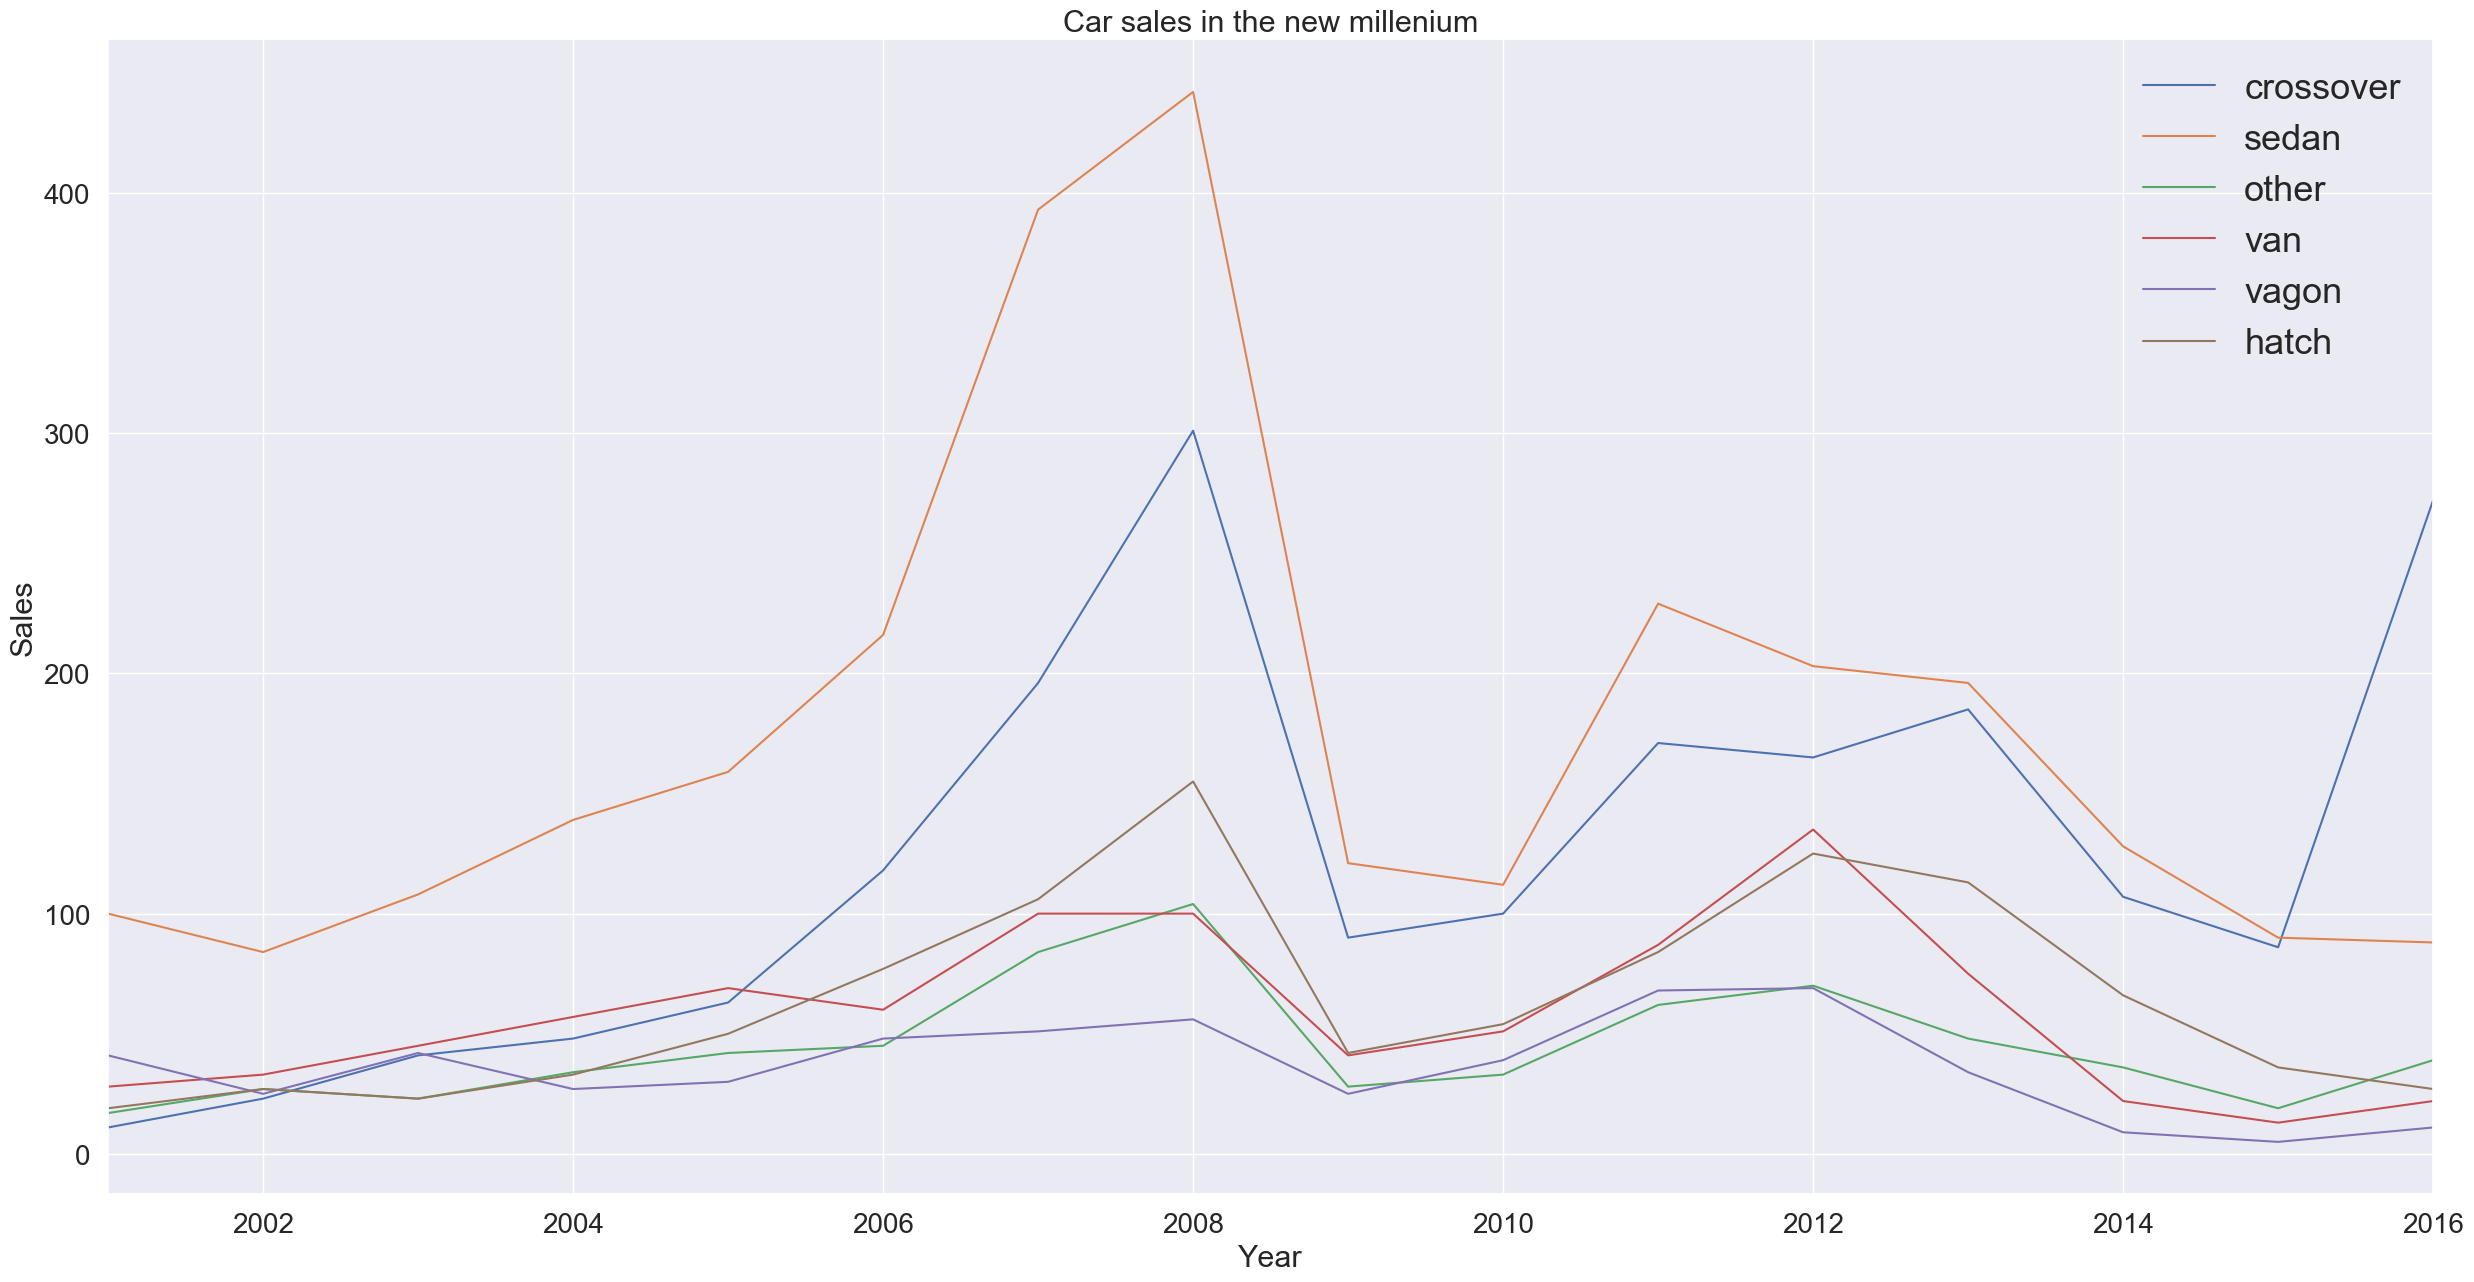

In [99]:
fig,ax = plt.subplots(figsize=(30,15))
for body in body_types:
    body_year_grp.loc[:,body].plot()

ax.legend(body_types,  prop={'size': 26});
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)

plt.title('Car sales in the new millenium' , fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.xlabel('Year', fontsize=22)
#body_year_grp.plot.line()



__Sedans__ are the largest selling by body type followed by __crossover__. __2009__ saw downfall in sales across all segments.

#### Hatchback Sales

In [90]:
car_sales_nonzero_df[car_sales_nonzero_df['body'] == 'hatch']['car'].value_counts().head(15)

Ford          117
Volkswagen    112
VAZ           112
Skoda         105
Nissan         92
Toyota         59
Hyundai        59
Opel           57
Peugeot        50
Daewoo         45
Renault        41
Chevrolet      41
ZAZ            40
Kia            33
Citroen        33
Name: car, dtype: int64

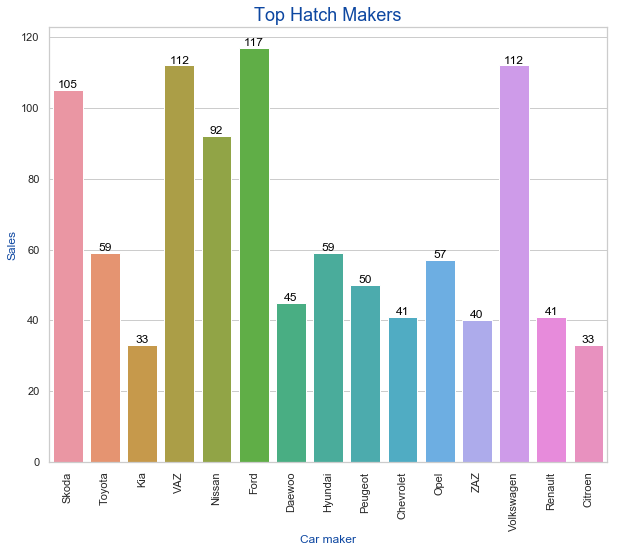

In [654]:
#list of top 15 hatch makers based on sales 
top_selling_cars = car_sales_nonzero_df[car_sales_nonzero_df['body'] == 'hatch']['car'].value_counts().head(15).keys().tolist()

temp_df = car_sales_nonzero_df[(car_sales_nonzero_df['car'].isin(top_selling_cars)) & (car_sales_nonzero_df['body'] == 'hatch')]

fig, ax = plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
plot = sns.countplot(x='car', data=temp_df)

#rotate X - axis labels
for item in plot.get_xticklabels():
    item.set_rotation(90)
    
#set column value on top of the bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
ax.set_xlabel('Car maker', size=12, color="#0D47A1")
ax.set_ylabel('Sales', size=12, color="#0D47A1")
ax.set_title('Top Hatch Makers', size=18, color="#0D47A1")

plt.show()

__Ford__ has sold the maximum number of hatchbacks with __117__ units followed by __Volkswagen__ and __VAZ__ at 112 each.

#### Van Sales

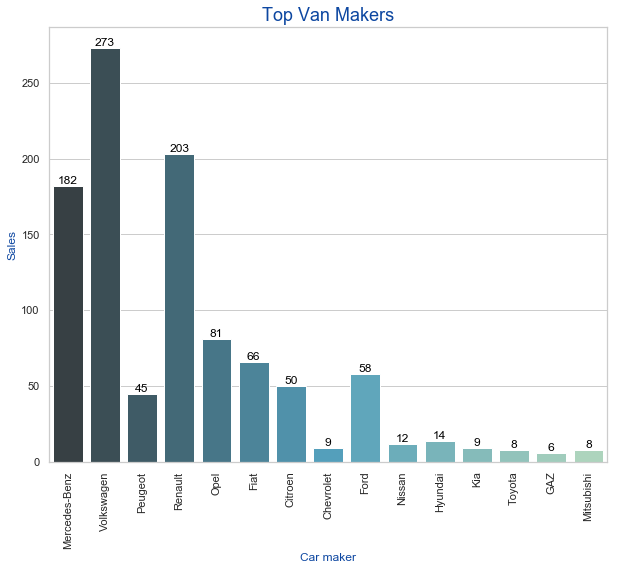

In [656]:
#list of top 15 van makers based on sales 
top_selling_cars = car_sales_nonzero_df[car_sales_nonzero_df['body'] == 'van']['car'].value_counts().head(15).keys().tolist()

temp_df = car_sales_nonzero_df[(car_sales_nonzero_df['car'].isin(top_selling_cars)) & (car_sales_nonzero_df['body'] == 'van')]

fig, ax = plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
plot = sns.countplot(x='car', data=temp_df, palette="GnBu_d")

#rotate X - axis labels
for item in plot.get_xticklabels():
    item.set_rotation(90)
    
#set column value on top of the bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
ax.set_xlabel('Car maker', size=12, color="#0D47A1")
ax.set_ylabel('Sales', size=12, color="#0D47A1")
ax.set_title('Top Van Makers', size=18, color="#0D47A1")

plt.show()

__Volkswagen__ has sold the maximum number of __Vans__ with __273__ units followed by __Renault__ at 203.

#### Sedan Sales since 2007

In [324]:
total_sedan_count = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['body'] == 'sedan')].count()[0]
total_sedan_count

2002

In [338]:
ls1 = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['body'] == 'sedan')].groupby(['car'])['car'].count().sort_values(ascending=False).head(10).keys().tolist()
ls2 = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['body'] == 'sedan')].groupby(['car'])['car'].count().sort_values(ascending=False).head(10).tolist()
top_10_sales = sum(ls2)
other_sales = total_sedan_count - top_10_sales
ls2.append(other_sales)
ls1.append('Others')

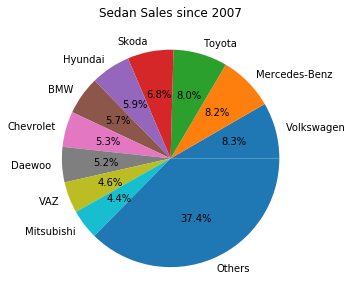

In [343]:
f,ax = plt.subplots(1,1,figsize=(7,5))
plt.pie(ls2, labels=ls1,autopct='%1.1f%%')
plt.title('Sedan Market share since 2007')
plt.show()

__Volkswagen__ has the highest market share with __8.3%__ in the Sedan segment since 2007.

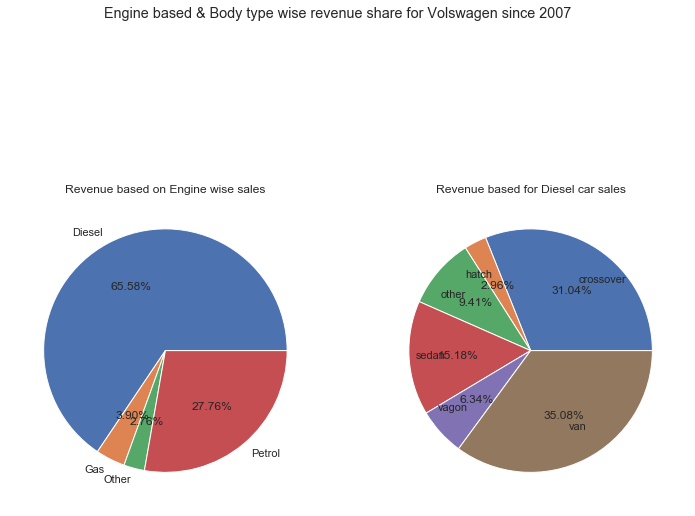

In [646]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

#Segregate Volkswagen cars based on engine type
ls1 = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['car'] == 'Volkswagen')].groupby(['engType'])['engType'].count().keys().tolist()
ls2 = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['car'] == 'Volkswagen')].groupby(['engType'])['price'].sum().tolist()

#Classify the Diesel engine vehicles further based on body type
ls3 = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['car'] == 'Volkswagen') & (car_sales_nonzero_df['engType'] == 'Diesel')].groupby(['body'])['body'].count().keys().tolist()
ls4 = car_sales_nonzero_df[(car_sales_nonzero_df['year'] > 2006) & (car_sales_nonzero_df['car'] == 'Volkswagen') & (car_sales_nonzero_df['engType'] == 'Diesel')].groupby(['body'])['price'].sum().tolist()


#plt.figure(figsize=(9, 6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))

ax1.set_title('Revenue based on Engine wise sales')
ax1.pie(ls2, radius=1, labels=ls1, autopct=make_autopct(ls2))
#plt.setp( sales1, width=0.3, edgecolor='white')

ax2.set_title('Revenue based for Diesel car sales')
ax2.pie(ls4, labels=ls3, radius=1, labeldistance=0.7, autopct=make_autopct(ls2))
#plt.setp( sales2, width=0.4, edgecolor='white')

plt.margins(0,0)
fig.suptitle('Engine based & Body type wise revenue share for Volswagen since 2007')
plt.show()

__65.68%__ of revenue earned by __Volkswagen__ is from __Diesel__ cars. Among the Diesel engines cars, __35.08%__ are Vans and __31.04%__ are Crossover types.

### 5.3.3 Relationship between Body Type and Engine Type

In [172]:
body_engine_tab = pd.crosstab(car_sales_nonzero_df["body"], car_sales_nonzero_df["engType"], rownames=['body'], colnames = ['engType'])     
body_engine_tab

engType,Diesel,Gas,Other,Petrol
body,,,,
crossover,766,421,52,830
hatch,129,200,124,799
other,296,84,55,403
sedan,535,865,177,2069
vagon,390,96,27,209
van,897,56,27,69


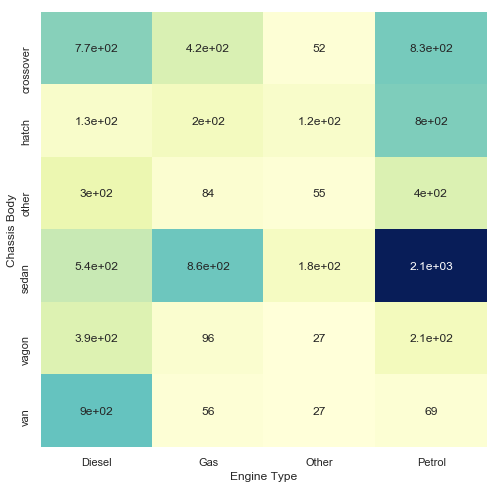

In [679]:
plt.figure(figsize=(8,8))
sns.heatmap(body_engine_tab,
            cmap="YlGnBu", annot=True, cbar=False)
plt.xlabel('Engine Type');
plt.ylabel('Chassis Body');

Most __Gas__ based cars are __Sedans__ while maximum number of __Sedans__ run on __Petrol__. __Vans__ almost exclusively run on __Diesel__.

<a id=section504></a>
## 5.4 Analysis based on Engine type

### 5.4.1 General Analysis

#### General Sales


In [693]:
car_sales_nonzero_df.groupby(['engType'])['engType'].value_counts()

engType  engType
Diesel   Diesel     3013
Gas      Gas        1722
Other    Other       462
Petrol   Petrol     4379
Name: engType, dtype: int64

Most cars sold run on __Petrol__ engine with __4379__ units followed by __Diesel__ cars at 3013 units.

#### General Revenue Analysis

In [694]:
car_sales_nonzero_df.groupby(['engType'])['price'].sum().sort_values(ascending = False)

engType
Petrol    7.379368e+07
Diesel    6.032704e+07
Gas       1.660249e+07
Other     8.446430e+06
Name: price, dtype: float64

The highest revenue is earned from __Petrol__ cars worth __73,793,680__ dollars followed by __Diesel__ cars at __60,327,040__ dollars.


### 5.4.2 Year Wise Sales

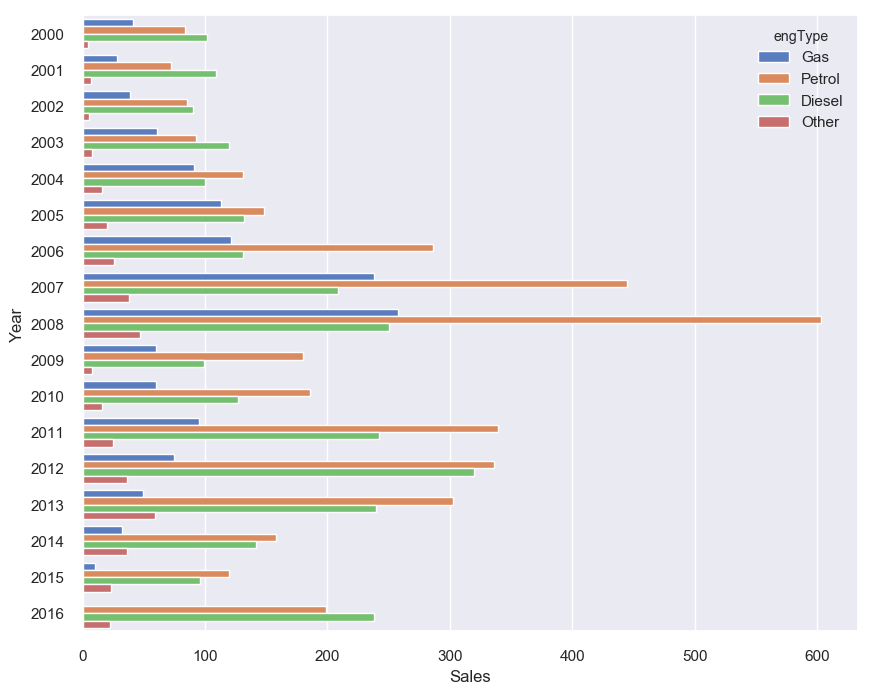

In [104]:
plt.figure(figsize=(10,8))
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y="year", hue='engType', data=car_sales_nonzero_df[car_sales_nonzero_df['year'] >= 2000])
plt.xlabel("Sales")
plt.ylabel("Year")
plt.show()

__Petrol__ engine cars generally occupy the top position in sales followed by __Diesel__. Since __2013__, sales of __Gas__ engine cars has decresed in favour of __Other__ cars.

<a id=section505></a>
## 5.5 Country Wise Sales Analysis

In [106]:
# Get names of all CAr manufacturers
car_sales_nonzero_df['car'].unique()

array(['Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'Volkswagen', 'Audi', 'Chrysler', 'Jaguar', 'Mitsubishi', 'Kia',
       'Porsche', 'Toyota', 'Hyundai', 'Opel', 'Chevrolet', 'Skoda',
       'Land Rover', 'Daewoo', 'Mazda', 'Lexus', 'Infiniti', 'Subaru',
       'VAZ', 'Alfa Romeo', 'Smart', 'Peugeot', 'Suzuki', 'Chery',
       'Bentley', 'Volvo', 'ZAZ', 'Citroen', 'Dodge', 'Fiat', 'Jeep',
       'Great Wall', 'SsangYong', 'Seat', 'MINI', 'Dacia', 'Hummer',
       'Geely', 'Maserati', 'BYD', 'Cadillac', 'Acura', 'Aston Martin',
       'Tesla', 'Rover', 'GAZ', 'GMC', 'Lincoln', 'Moskvich-AZLK', 'FAW',
       'UAZ', 'TATA', 'ZX', 'Lifan', 'Mercury', 'Groz', 'Moskvich-Izh',
       'Saab', 'Lancia', 'Aro', 'Ferrari', 'Isuzu', 'Bogdan', 'Dadi',
       'Rolls-Royce', 'Other-Retro', 'MG', 'Samand', 'JAC', 'Samsung',
       'Lamborghini', 'Daihatsu', 'Hafei', 'SMA', 'ЛUAZ', 'Huanghai',
       'Wartburg', 'Buick', 'Changan', 'Barkas', 'Fisker'], dtype=object)

In [107]:
def get_country(car):
    country_maker_dict = {
        'Ford': 'USA',
        'Mercedes-Benz': 'Germany',
        'Nissan': 'Japan', 
        'Honda': 'Japan',
        'Renault': 'France',
        'BMW': 'Germany',
        'Volkswagen': 'Germany', 
        'Audi': 'Germany',
        'Chrysler': 'USA',
        'Jaguar': 'India',
        'Mitsubishi': 'Japan',
        'Kia': 'South Korea',
        'Porsche': 'Germany',
        'Toyota': 'Japan',
        'Hyundai': 'South Korea',
        'Opel': 'Germany',
        'Chevrolet': 'USA', 
        'Skoda': 'Germany',
        'Land Rover': 'India',
        'Daewoo': 'South Korea',
        'Mazda': 'Japan',
        'Lexus': 'Japan',
        'Infiniti': 'Japan',
        'Subaru': 'Japan',
        'VAZ': 'Russia', 'Alfa Romeo': 'Italy', 'Smart': 'Germany', 'Peugeot': 'France', 'Suzuki': 'Japan', 'Chery': 'China',
        'Bentley': 'UK', 'Volvo': 'Sweden', 'ZAZ': 'Ukraine', 'Citroen': 'France', 'Dodge': 'USA', 'Fiat': 'Italy', 'Jeep': 'Italy',
        'Great Wall': 'China', 'SsangYong': 'South Korea', 'Seat': 'Spain', 'MINI': 'UK', 'Dacia': 'Romania', 'Hummer': 'USA',
        'Geely': 'China', 'Maserati': 'Italy', 'BYD': 'China', 'Cadillac': 'USA', 'Acura': 'Japan', 'Aston Martin': 'UK',
        'Tesla': 'USA', 'Rover': 'India', 'GAZ': 'Russia', 'GMC': 'USA', 'Lincoln': 'USA', 'Moskvich-AZLK': 'Russia', 'FAW':'China',
        'UAZ': 'Russia', 'TATA': 'India', 'ZX': 'China', 'Lifan': 'China', 'Mercury': 'USA', 'Groz': 'Ukraine', 'Moskvich-Izh': 'Russia',
        'Saab': 'Sweden', 'Lancia': 'Italy', 'Aro': 'Romania', 'Ferrari': 'Italy', 'Isuzu': 'Japan', 'Bogdan': 'Ukraine', 'Dadi': 'China',
        'Rolls-Royce': 'UK', 'Other-Retro': "Other", 'MG': 'UK', 'Samand': 'Iran', 'JAC': 'China', 'Samsung': 'South Korea',
        'Lamborghini': 'Italy', 'Daihatsu': 'Japan', 'Hafei': 'China', 'SMA': 'China', 'ЛUAZ': 'China', 'Huanghai': 'China',
        'Wartburg': 'Germany', 'Buick': 'USA', 'Changan': 'China' , 'Barkas': 'Germany', 'Fisker': 'USA'
    }
    
    return country_maker_dict.get(car['car'], "Other")

#Adding a country column which maps the car manufacturer with his home country
car_sales_nonzero_df['country'] = car_sales_nonzero_df.apply(get_country, axis=1)

In [108]:
car_sales_nonzero_df['country'].value_counts()

Germany        3927
Japan          2068
South Korea     863
France          759
USA             682
Russia          561
India           175
Italy           162
China           145
Ukraine         106
UK               40
Spain            39
Sweden           33
Romania          13
Iran              2
Other             1
Name: country, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text yticklabel objects>)

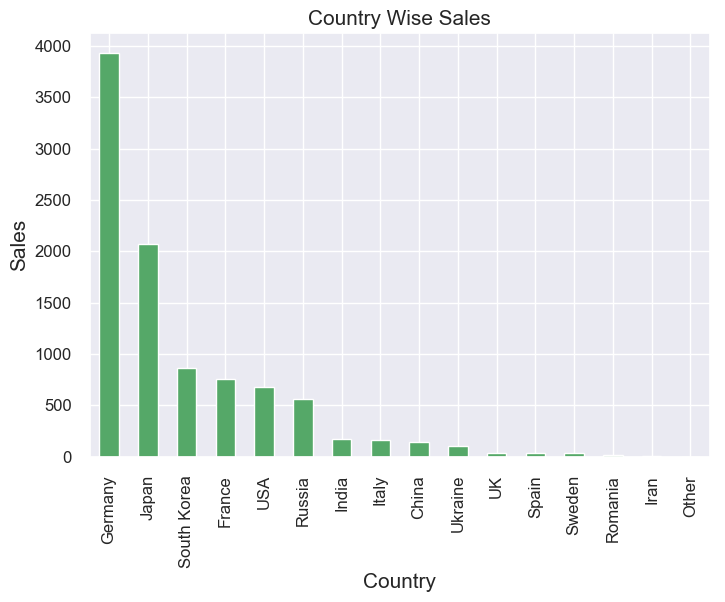

In [120]:
car_sales_nonzero_df['country'].value_counts().plot.bar(color='g')
plt.xlabel('Country', size = 15)
plt.ylabel('Sales', size = 15)
plt.title('Country Wise Sales', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

__Germany__ accounts for the highest number of cars sold overall with __3927__ units followed by __Japan__ with __2068__.

In [661]:
car_sales_nonzero_df[car_sales_nonzero_df['year'] > 2000]['country'].value_counts()

Germany        3082
Japan          1861
South Korea     828
France          712
USA             585
Russia          338
India           166
China           140
Italy           136
Ukraine          92
UK               40
Spain            33
Sweden           24
Romania          12
Iran              2
Name: country, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

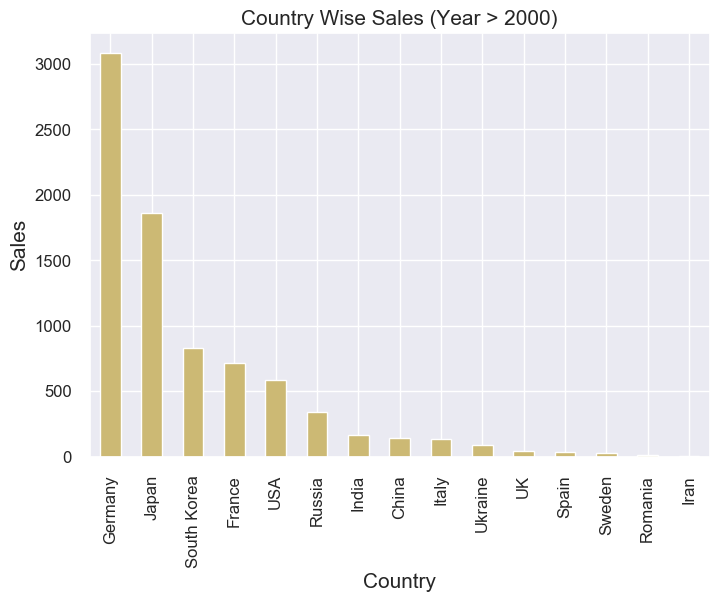

In [121]:
car_sales_nonzero_df[car_sales_nonzero_df['year'] > 2000]['country'].value_counts().plot.bar(color='y')
plt.xlabel('Country', size = 15)
plt.ylabel('Sales', size = 15)
plt.title('Country Wise Sales (Year > 2000)', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

After the turn of the millenium, still __Germany__ accounts for the highest number of cars sold overall with __3082__ units followed by __Japan__ with __1861__.

#### German Car Sales

In [111]:
german_car_grp = car_sales_nonzero_df[car_sales_nonzero_df['country'] == 'Germany'].groupby('car')['price']

In [112]:
# Get All the German Car manufacturer names
gkeys = german_car_grp.groups.keys()
klist = list(gkeys)
klist

['Audi',
 'BMW',
 'Barkas',
 'Mercedes-Benz',
 'Opel',
 'Porsche',
 'Skoda',
 'Smart',
 'Volkswagen',
 'Wartburg']

In [113]:
#Get the total revenue from sales for each manufacturer
german_car_sales = german_car_grp.sum().tolist()
german_car_sales

[8357068.000000001,
 16527707.25,
 5500.0,
 30222572.0,
 2535727.0,
 4655271.5,
 3993390.37255,
 385918.34235,
 12278789.7652,
 1000.0]

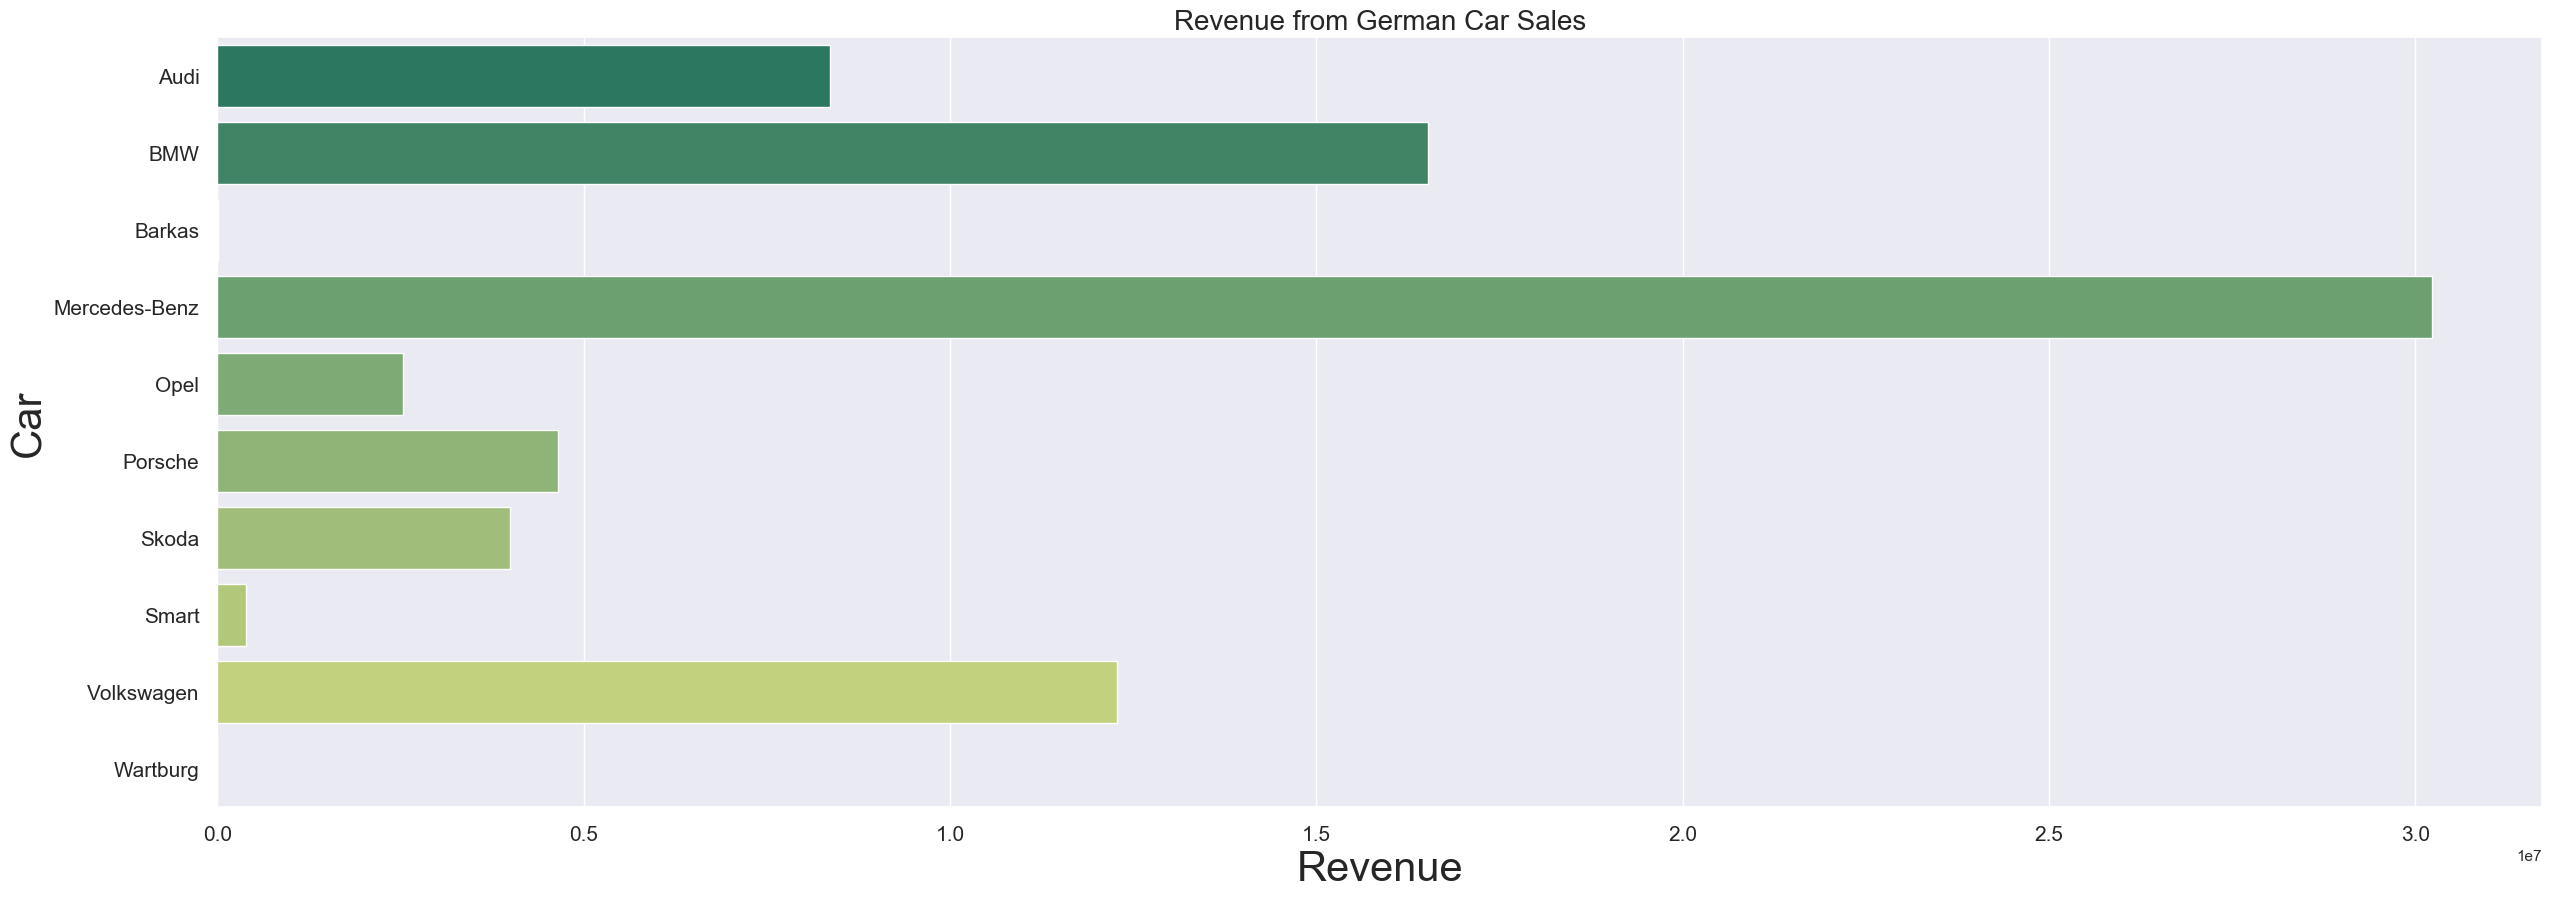

In [122]:
fig = plt.figure(figsize=(30,10))
fig.add_subplot(111)
b = sns.barplot(x = german_car_sales, y = klist, palette="summer", saturation=.65 )

b.axes.set_title("Revenue from German Car Sales",fontsize=20)
b.set_xlabel("Revenue",fontsize=30)
b.set_ylabel("Car",fontsize=30)
b.tick_params(labelsize=15)

__Mercedes Benz__ has the highest revenue among German car makers grossing __30222572 dollars__

<a id=section506></a>
## 5.6 Price Based Analysis

### 5.6.1 Price segments based on Engine type 

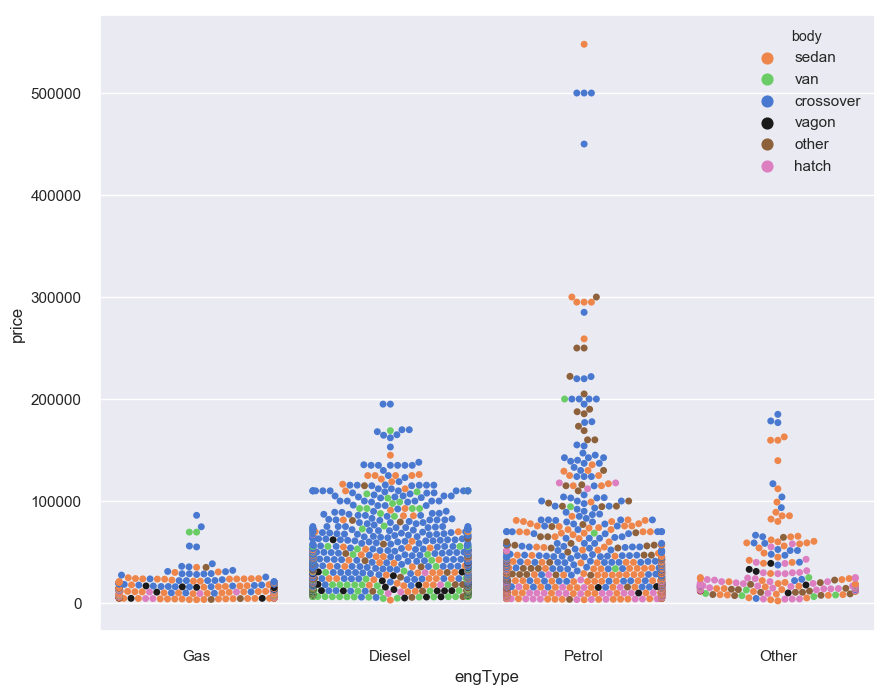

In [123]:
plt.figure(figsize=(10,8))

#Swarm Plot based on Engine Type
sns.swarmplot(x="engType", y="price", hue='body', data=car_sales_nonzero_df[car_sales_nonzero_df['year'] > 2010], palette ={"crossover":"C0","sedan":"C1","van":"C2", "vagon":"k", "other":"C5","hatch":"C6"})

__Petrol Crossover__ cars are generally of higher price while the __Gas__ cars are the cheapest. Most __hatchback__ cars are either petrol based or other engine types.

### 5.6.2 Minimum, Maximum and Average prices across segments 

In [674]:
#group based on calendar year and body type
year_body_grp = car_sales_nonzero_df[car_sales_nonzero_df['year'] >= 2006].groupby(['year', 'body'])

year_body_grp.size()

year  body     
2006  crossover    118
      hatch         77
      other         45
      sedan        216
      vagon         48
      van           60
2007  crossover    196
      hatch        106
      other         84
      sedan        393
      vagon         51
      van          100
2008  crossover    301
      hatch        155
      other        104
      sedan        442
      vagon         56
      van          100
2009  crossover     90
      hatch         42
      other         28
      sedan        121
      vagon         25
      van           41
2010  crossover    100
      hatch         54
      other         33
      sedan        112
      vagon         39
      van           51
                  ... 
2012  crossover    165
      hatch        125
      other         70
      sedan        203
      vagon         69
      van          135
2013  crossover    185
      hatch        113
      other         48
      sedan        196
      vagon         34
      van         

In [675]:
price_prof_cols = ['year','body','average','min', 'max']
price_prof_df = pd.DataFrame(columns=price_prof_cols)         # columns is used to set the column name

#get the min, max and average prices for each body type for every year and create a temporary data frame
for group_name, df_group in year_body_grp:  
    param_list = [(group_name[0], group_name[1], df_group['price'].median(), df_group['price'].min(), df_group['price'].max())]
    price_prof_df = price_prof_df.append(pd.DataFrame(param_list, columns=price_prof_cols))
price_prof_df.reset_index(inplace=True)
price_prof_df

,index,year,body,average,min,max
0,0,2006,crossover,13450.0000,4000.00,40000.0
1,0,2006,hatch,6000.0000,2100.00,11600.0
2,0,2006,other,8800.0000,3500.00,130000.0
3,0,2006,sedan,7899.0000,1600.00,55000.0
4,0,2006,vagon,7350.0000,2200.00,17500.0
5,0,2006,van,7900.0000,1650.00,20000.0
6,0,2007,crossover,15950.0000,2500.00,37249.5
7,0,2007,hatch,6725.0000,1950.00,13899.0
8,0,2007,other,11100.0000,2999.00,74900.0
9,0,2007,sedan,8000.0000,1300.00,39900.0


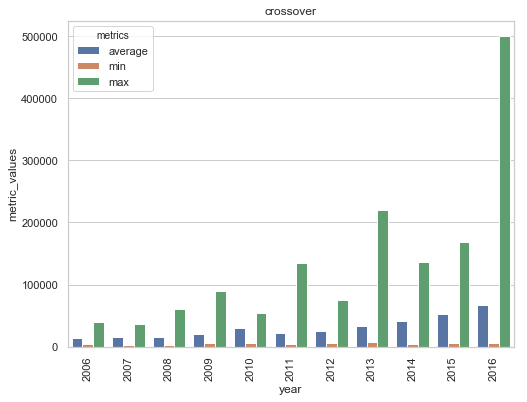

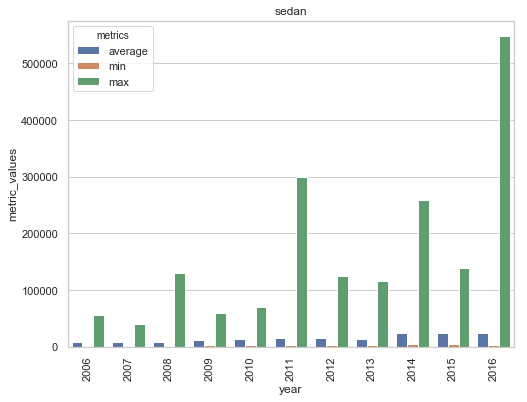

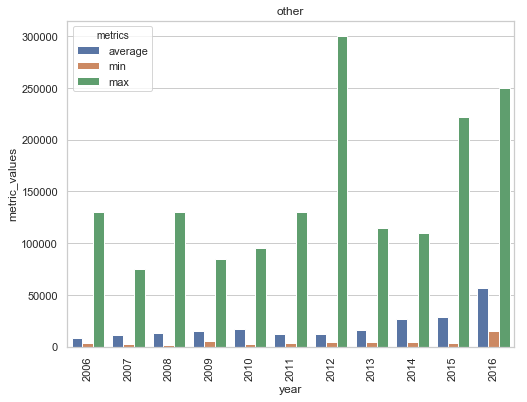

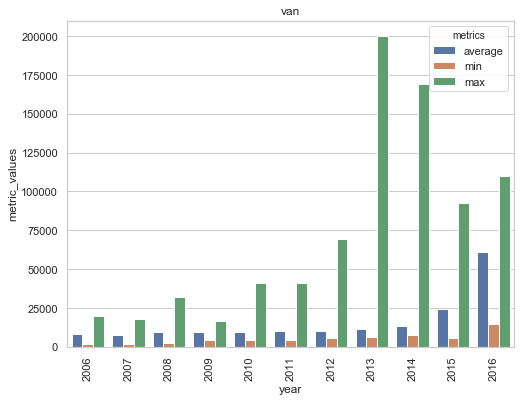

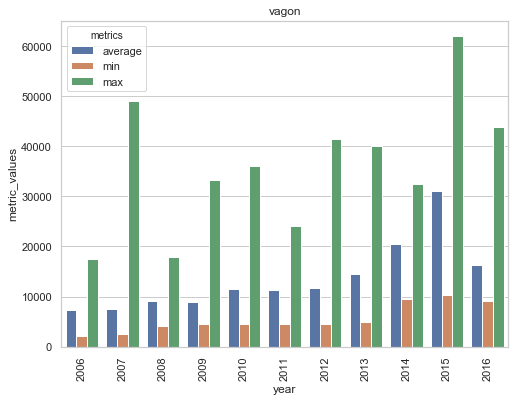

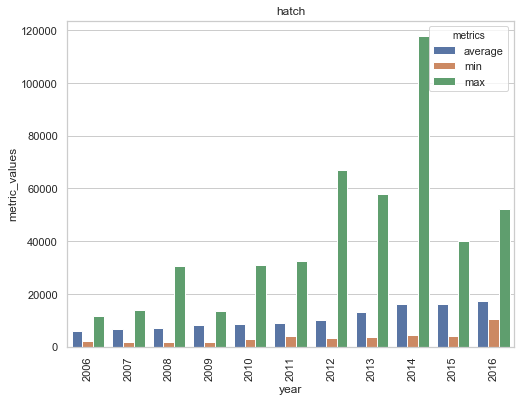

In [676]:
#create a separate plot for each body type
for btype in body_types:
    price_prof_df = pd.DataFrame(columns=price_prof_cols) 
    year_body_grp = car_sales_nonzero_df[(car_sales_nonzero_df['year'] >= 2006) & (car_sales_nonzero_df['body'] == btype)].groupby(['year', 'body'])

    for group_name, df_group in year_body_grp:  
        param_list = [(group_name[0], group_name[1], df_group['price'].median(), df_group['price'].min(), df_group['price'].max())]
        price_prof_df = price_prof_df.append(pd.DataFrame(param_list, columns=price_prof_cols))

    price_prof_df.reset_index(inplace=True)
    
    melt_params = price_prof_df.drop('index', axis=1).drop('body', axis=1).melt('year', var_name='metrics', value_name='metric_values')
    plt.figure(figsize=(8,6))
    ax=sns.barplot(x='year', y='metric_values', hue='metrics', data=melt_params)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.title(btype)
    plt.show()
    

With the exception of __Vagon__, the average prices of other segments keep incresing every year.

### 5.6.3 Analysis based on price groups

Segregate the proces into 4 groups:
- Less than 10000
- Between 10000 and 50000
- Between 50000 and 100000
- Above 100000

Determine the volume of sales for each car maker in each of these price groups

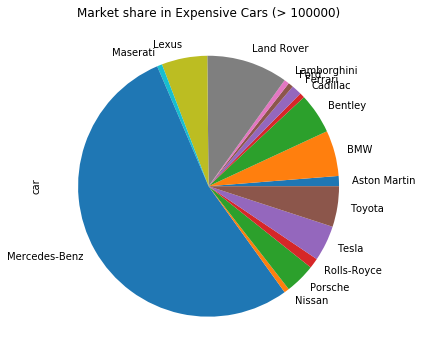

In [417]:
plt.figure(figsize=(9, 6))
car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 100000)].groupby('car')['car'].count().plot.pie()
plt.title('Market share in Expensive Cars (> 100000)')
plt.show()

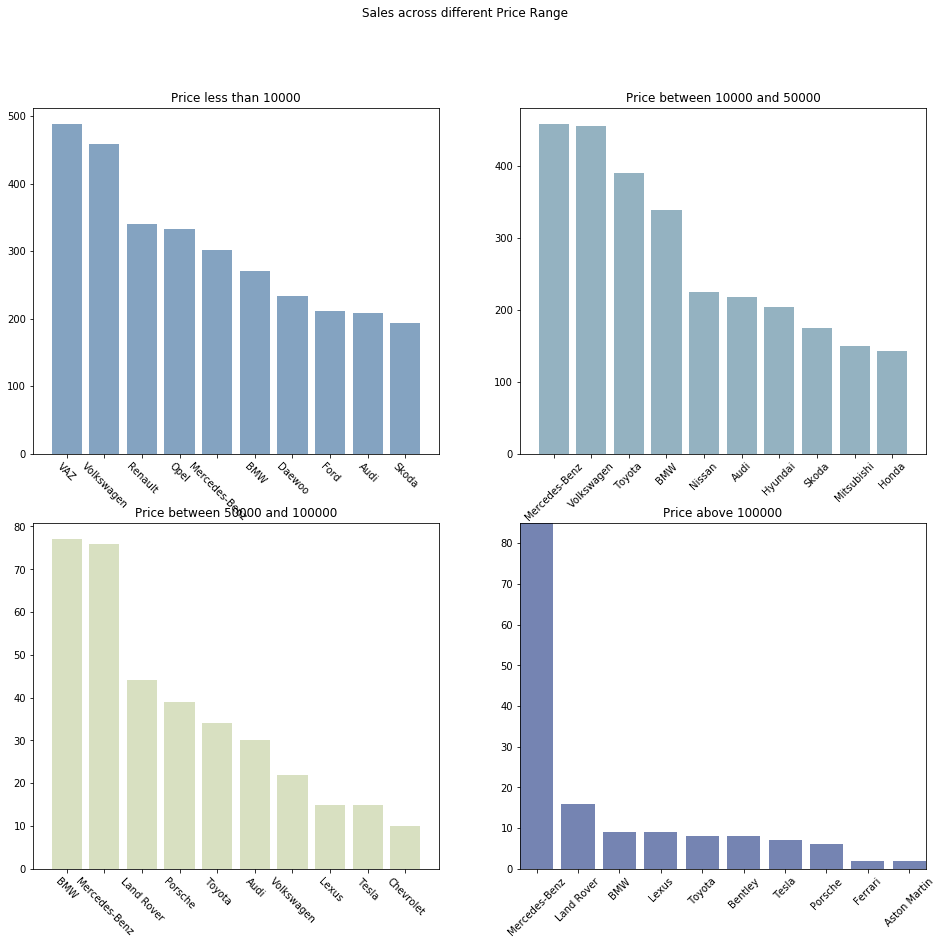

In [457]:
#into 4 groups - Segregate sales 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,14))

#Create sub plots for every price range

ax1.set_title('Price less than 10000')
ls1 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] < 10000)]['car'].value_counts().sort_values(ascending=False).head(10).keys().tolist()
ls2 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] < 10000)]['car'].value_counts().sort_values(ascending=False).head(10).tolist()
ax1.bar(ls1, ls2, color=(0.2, 0.4, 0.6, 0.6))
ax1.tick_params(axis ='x', rotation =-45)

ax2.set_title('Price between 10000 and 50000')
ls1 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 10000) & (car_sales_nonzero_df['price'] < 50000)]['car'].value_counts().sort_values(ascending=False).head(10).keys().tolist()
ls2 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 10000) & (car_sales_nonzero_df['price'] < 50000)]['car'].value_counts().sort_values(ascending=False).head(10).tolist()
ax2.bar(ls1, ls2, color=(0.3, 0.5, 0.6, 0.6))
ax2.tick_params(axis ='x', rotation =45)

ax3.set_title('Price between 50000 and 100000')
ls1 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 50000) & (car_sales_nonzero_df['price'] < 100000)]['car'].value_counts().sort_values(ascending=False).head(10).keys().tolist()
ls2 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 50000) & (car_sales_nonzero_df['price'] < 100000)]['car'].value_counts().sort_values(ascending=False).head(10).tolist()
ax3.bar(ls1, ls2, color=(0.5, 0.6, 0.2, 0.3))
ax3.tick_params(axis ='x', rotation =-45)

ax4.set_title('Price above 100000')
ls1 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 100000)]['car'].value_counts().sort_values(ascending=False).head(10).keys().tolist()
ls2 = car_sales_nonzero_df[(car_sales_nonzero_df['price'] >= 100000)]['car'].value_counts().sort_values(ascending=False).head(10).tolist()
ax4.bar(ls1, ls2, color=(0.1, 0.2, 0.5, 0.6))
ax4.tick_params(axis ='x', rotation =45)

plt.margins(0,0)
fig.suptitle('Sales across different Price Range')
plt.show()


__Mercedes-Benz__ has virtual monopoly in the expensive car segment. It has near top share in the next two price ranges. In the lowest price bracket, __VAZ__ and __Volkswagen__ sell the most number of cars.

<a id=section507></a>
## 5.7 Model Wise Analysis

### 5.7.1 Cars which have sold for the longest duration in terms of number of calendar years

In [664]:
#Group each model against the unique year of sale 
model_duration_grp = car_sales_nonzero_df.groupby(['car','model'])['year'].unique()
model_duration_grp

car           model       
Acura         MDX                                            [2008, 2005, 2014]
              RL                                                   [2008, 2006]
              TL                                                         [2005]
              TLX                                                        [2015]
              ZDX                                                        [2010]
Alfa Romeo    147                                                        [2002]
              156                                                  [2003, 2000]
              159                                                  [2008, 2009]
              33                                                         [1991]
              75                                                         [1991]
              Giulietta                                                  [2012]
Aro           10                                                         [1992]
Aston Martin 

In [665]:
model_duration_grp.head()

car    model
Acura  MDX      [2008, 2005, 2014]
       RL             [2008, 2006]
       TL                   [2005]
       TLX                  [2015]
       ZDX                  [2010]
Name: year, dtype: object

In [631]:
#Get the unique year of sale for each model
unique_year_grp = car_sales_nonzero_df.groupby(['car','model']).apply(lambda x: x['year'].unique())

#create a temporary data frame with model, list of years of sale and the number of such years
model_time_cols = ['make_model','years','total_years']
model_time_df = pd.DataFrame(columns=model_time_cols)         

for key in unique_year_grp.keys():
    model_name = str(key[0]) + str(" - ") + str(key[1])
    param_list = [[model_name, unique_year_grp[key], len(unique_year_grp[key])]]
    model_time_df = model_time_df.append(pd.DataFrame(param_list, columns=model_time_cols))

#sort the group based on the models with highest number of calender years 
model_time_df = model_time_df.sort_values('total_years', ascending=False)

#Pick top 15 models
model_time_df_15 = model_time_df.head(15)
model_time_df_15.reset_index(inplace=True)
model_time_df_15 = model_time_df_15.drop('index', axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

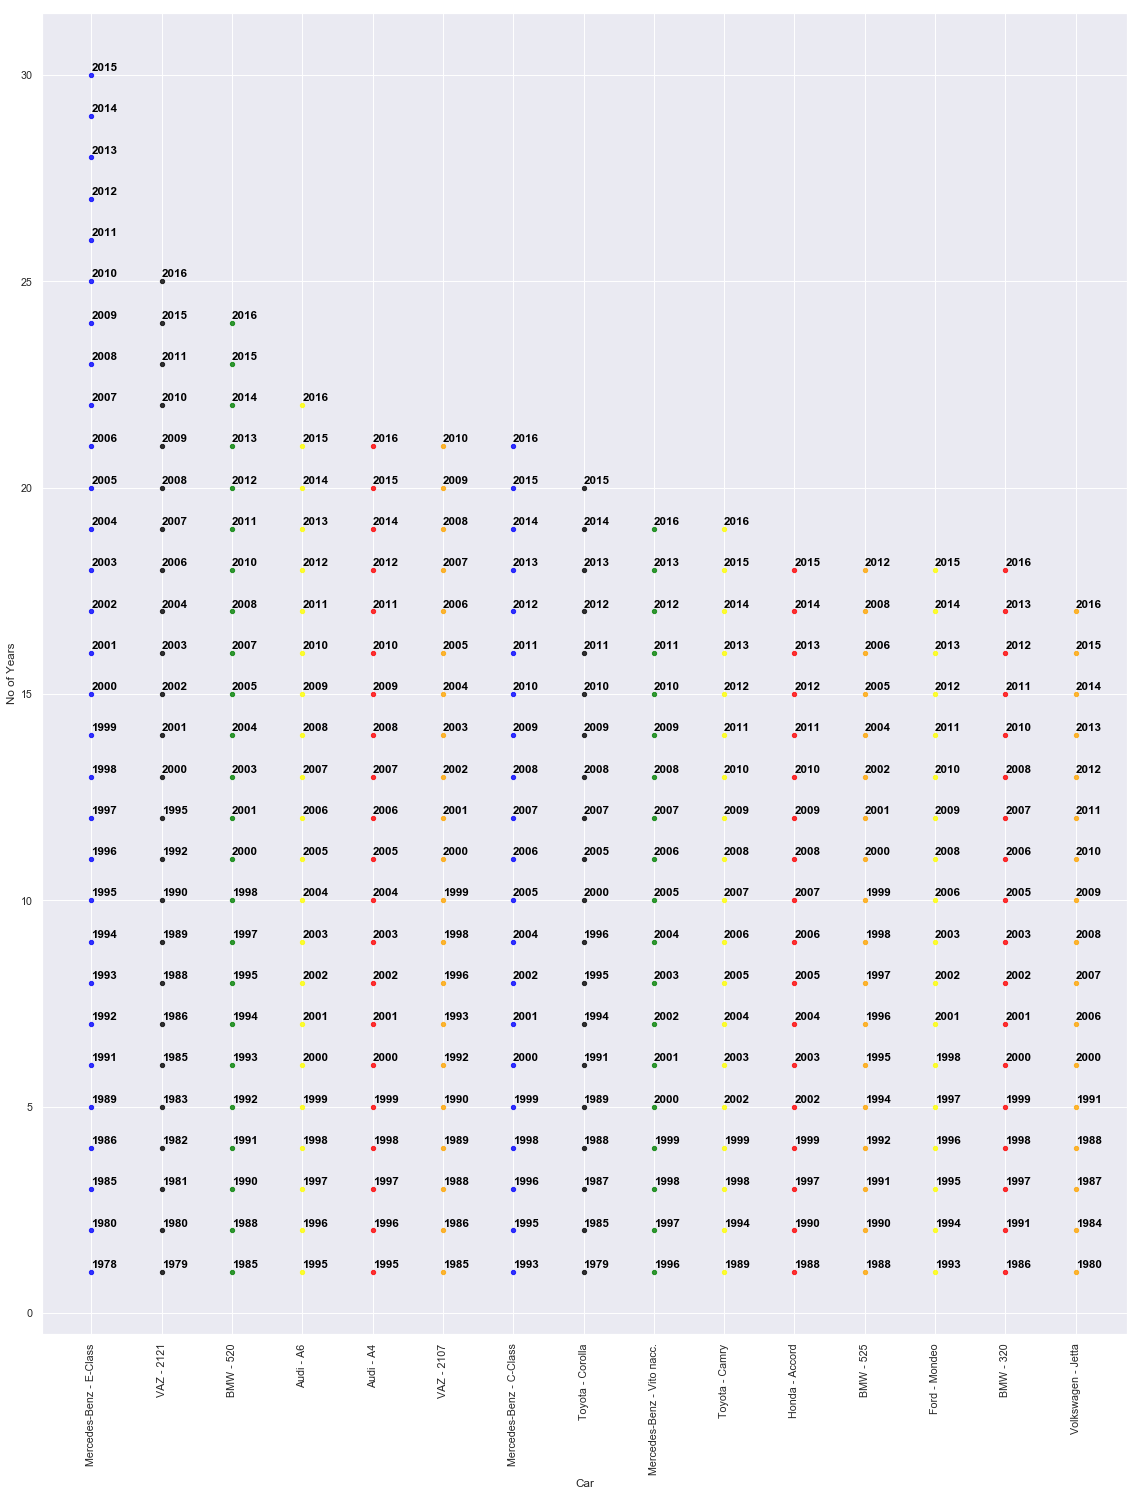

In [645]:
#Function to plot a point in the graph for a model corresponding to the count of year of sale
def plot_point_graph(model, position, year, clr):
    param_list = [[model, position]]
    model_time_df = pd.DataFrame(param_list, columns=['Car', 'No of Years'])
    
    g = sns.regplot(data=model_time_df, x="Car", y="No of Years", fit_reg=False, marker="o", color=clr, scatter_kws={'s':20})
    g.text(model, position+0.1, str(year), horizontalalignment='left', size='medium', color='black', weight='semibold')

w = 20
h = 25
d = 70

plt.figure(figsize=(w,h), dpi=d)
colors = ["blue","black","green","yellow","red","orange","blue","black","green","yellow","red","orange", "yellow","red","orange"]

#Iterate across each model
for idx,row in model_time_df_15.iterrows():
    row['years'].sort()
    year_cnt = row['total_years']
    clr = colors[idx]
    
    #Plot each year of sale corresponding to the model
    for x in range(1, year_cnt + 1):
        plot_point_graph(row['make_model'], x, row['years'][x - 1], clr)

plt.xticks(rotation=90)


__Mercedes-Benz E-Class__ has sold for 30 years starting in 1978 until 2015. __VAZ 2121__ has been sold for 25 years and __BMW 520__ for 24 years.

### 5.7.2 Category Wise best selling Model

##### Best Selling models based on Body type since the millenium

In [668]:
top_model = (car_sales_nonzero_df[car_sales_nonzero_df['year'] >= 2000].groupby('body')['model']
                    .apply(lambda x: x.value_counts().head(3))
                    .reset_index())
print(top_model)

         body                 level_1  model
0   crossover                      X5    113
1   crossover      Land Cruiser Prado     72
2   crossover                  Tucson     67
3       hatch                    Leaf     53
4       hatch                   Fabia     51
5       hatch                  Fiesta     45
6       other                  Fortwo     37
7       other              Vito пасс.     27
8       other  T5 (Transporter) пасс.     17
9       sedan                   Camry    122
10      sedan                 E-Class    117
11      sedan                   Lanos    107
12      vagon                  Megane     53
13      vagon                      A6     47
14      vagon                   Fabia     21
15        van              Vito пасс.     88
16        van            Kangoo груз.     64
17        van             Caddy груз.     51


The following are the best selling models are per the body type:
- Crossover : BMW X5
- Hatch : Nissan Leaf
- Sedan : Toyota Camry
- Vagon : Renault Megane
- Van : Mercedes-Benz NACC
- Others : Smart Fortwo

##### Best Selling models for each year since the millenium

In [669]:
top_model = (car_sales_nonzero_df[car_sales_nonzero_df['year'] >= 2000].groupby('year')['model']
                    .apply(lambda x: x.value_counts().head(3))
                    .reset_index())
print(top_model)

    year           level_1  model
0   2000           E-Class     19
1   2000                A6     16
2   2000        Vito пасс.     10
3   2001               530     12
4   2001           E-Class     12
5   2001                A6     12
6   2002                A6     14
7   2002               320     11
8   2002         Passat B5     10
9   2003                A6     17
10  2003           E-Class     15
11  2003         Passat B5     11
12  2004        Vito пасс.     12
13  2004          Vectra C     11
14  2004             Lanos     11
15  2005        Vito пасс.     12
16  2005            Megane     11
17  2005                A6     10
18  2006           Lacetti     12
19  2006                X5     11
20  2006                A6     11
21  2007             Lanos     35
22  2007             Camry     24
23  2007            Lancer     23
24  2008             Camry     28
25  2008      Pajero Wagon     27
26  2008            Accord     26
27  2009            Tucson      9
28  2009      

Some of the best selling models across each calendar year following the millenium:
- 2000 : Mercedes-Benz E-Class
- 2001 : Mercedes-Benz E-Class, BMW 530, Audi A6 
- 2002 : Audi A6
- 2003 : Audi A6 
- 2004 : Mercedes-Benz Vito Nacc
- 2005 : Mercedes-Benz Vito Nacc
- 2006 : Lacetti     
- 2007 : Daewoo Lanos
- 2008 : Toyota Camry 
- 2009 : Ford Tucson
- 2010 : Octavia A5
- 2011 : Octavia A5
- 2012 : Octavia A5
- 2013 : Nissan Leaf
- 2014 : Nissan Leaf
- 2015 : Toyota Camry 
- 2016 : BMW X5

<a id=section508></a>
## 5.8 Mileage Analysis

In [125]:
top_selling_cars = car_sales_nonzero_df['car'].value_counts().head(5).keys().tolist()

Text(0.5, 1.0, 'Engine Type Vs. Mileage')

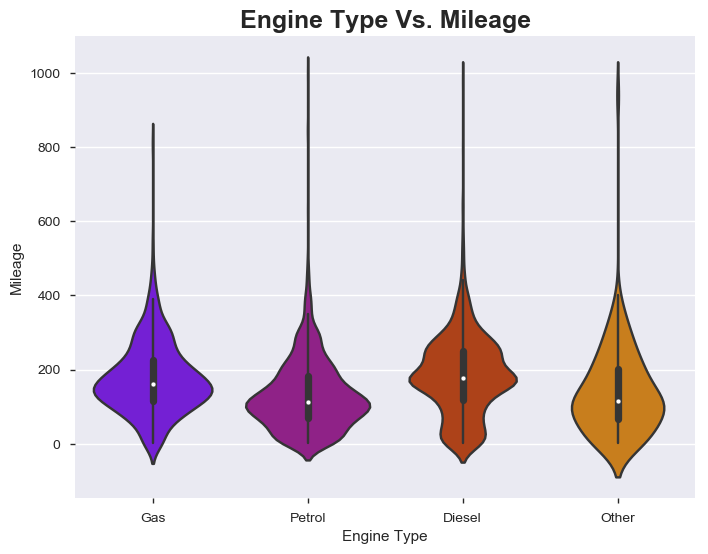

In [126]:
#Find the mileage offered amongst top selling cars
temp_df = car_sales_nonzero_df[car_sales_nonzero_df['car'].isin(top_selling_cars)]

plt.figure(figsize=(8,6))
#Compare Fuel type with the mileage offered
ax = sns.violinplot(x="engType", y="mileage", palette="gnuplot", data=temp_df)
plt.xlabel("Engine Type")
plt.ylabel("Mileage")
plt.title("Engine Type Vs. Mileage", fontsize=18, fontweight = "bold")

Text(0, 0.5, 'Mileage')

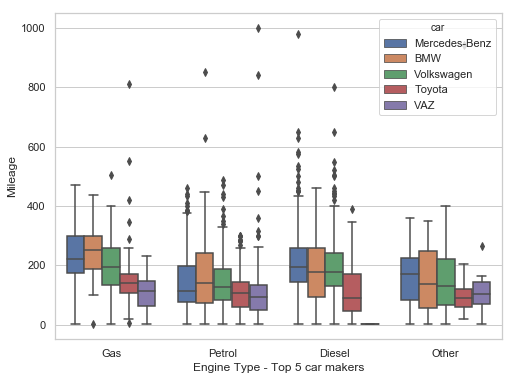

In [688]:
plt.figure(figsize=(8,6))

sns.boxplot(x="engType", y="mileage", hue='car', data=temp_df)
plt.xlabel("Engine Type - Top 5 car makers")
plt.ylabel("Mileage")

Text(0, 0.5, 'Mileage')

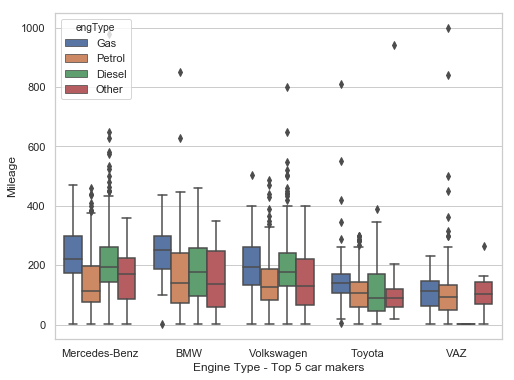

In [689]:
plt.figure(figsize=(8,6))

sns.boxplot(x="car", y="mileage", hue='engType', data=temp_df)

plt.xlabel("Engine Type - Top 5 car makers")
plt.ylabel("Mileage")

Text(0, 0.5, 'Mileage')

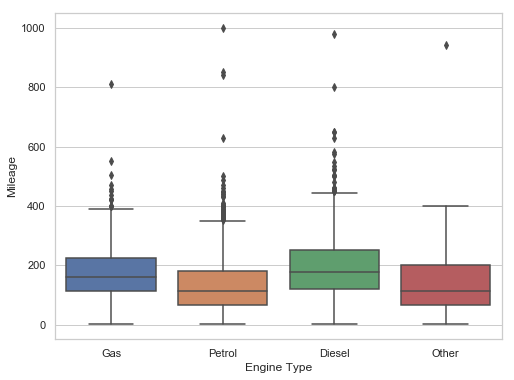

In [691]:
plt.figure(figsize=(8,6))

sns.set_style("whitegrid")
sns.boxplot(x="engType", y="mileage", data=temp_df)

plt.xlabel("Engine Type")
plt.ylabel("Mileage")

__Diesel__ cars provide the better mileage compared to other engine types.

<a id=section509></a>
## 5.9 Registration Analysis

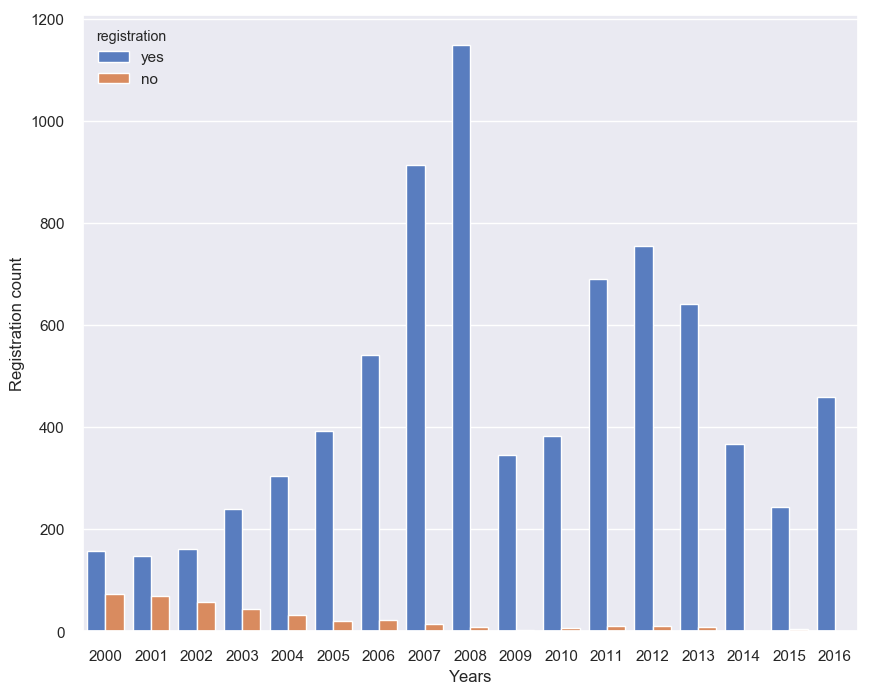

In [127]:
plt.figure(figsize=(10,8))
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot("year", hue='registration', data=car_sales_nonzero_df[car_sales_nonzero_df['year'] >= 2000])
plt.ylabel("Registration count")
plt.xlabel("Years")
plt.show()

The number of unregistered cars were high in __2000__ but gradually came down to negligible number by 2016.

<a id=section6></a> 
# 6. Conclusion

- There are __87__ distinct car manufacturers and __888__ distinct models.

- __2008__ was the year with highest sales in terms of volume with __1158__ units while __2016__ was the year with highest overall revenue at __30,526,090__ dollars.

- __Volkswagen__ accounts for highest number of cars sold with 936 units while __Mercedes-Benz__ has earned the highest revenue through sales worth __30,222,570__ dollars

- __Sedans__ have been the top-selling segment with sales of __3646__ units. In terms of revenue, __Crossover__ tops the segments and has grossed __67,345,920__ dollars.

- __Petrol__ engine cars have sold the highest with __4379__ units and have earned __73,793,680__ dollars.

- There was a big drop in sales in __2009__ with only 347 units being sold. Mercedes-Benz suffered a loss in revenue of __1,126,277.0__ dollars.

- __Germany__ accounts for the highest number of cars sold overall with __3082__ units. __Mercedes Benz__ has the highest revenue among German car makers grossing __30222572 dollars__ .

- __Ford__ is the top maker of hatchbacks selling __117__ units. __Volkswagen__ sold the highest number of __Vans__ 112 each.

- __Volkswagen__ also has the highest share of revenue - __8.3%__ from __Sedan__ sales, since 2007. 
__65.68%__ of revenue earned by __Volkswagen__ is from __Diesel__ cars. Among the Diesel engines cars, __35.08%__ are Vans and __31.04%__ are Crossover types.

- __Toyota Camry__ is the highest selling Sedan since 2000.

- __Petrol Crossover__ cars are generally of higher price while the __Gas__ cars are the cheapest. Most __hatchback__ cars are either petrol based or other engine types.

- __Mercedes-Benz E-Class__ has sold the highest number of expensive cars(> 100000) with 85.

- __Mercedes-Benz E-Class__ is the longest selling model with duration of 30 years starting in 1978 until 2015.

- __Diesel__ cars provide the better mileage compared to other engine types.

In [105]:
dfr1 = pd.read_csv("https://raw.githubusercontent.com/RajkumarBharathi/Insaid2019_April_EDA/master/car_sales.csv")
dfr1.shape

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>